# Movie Ratings EDA

## DataFrame Contents

- Poster_Link: Link to see the poster of the movie
- Series_Title: The name of the movie
- Released_Year: The year where the movie was first released
- Certificate: Certification grade that the movie received
- Runtime: Duration of the movie
- Genre: Genre of the movie
- IMDB_Rating: The IMDB rating of the movie
- Overview: Movie summary / synopsis
- Meta_score: The meta score of the movie
- Director: The name of the movie director
- Star1: The main lead of the movie
- Star2: The main lead of the movie
- Star3: The main lead of the movie
- Star4: The main lead of the movie
- No_of_Votes: The number of votes given to the movie
- Gross: The total amount of money the movie makes

## Questions to Answer

For each year and all time:
    - Highest:
        - imdb rating
        - meta score
        - number of votes
        - runtime
        - gross
    - Lowest: 
        - imdb rating
        - meta score
        - number of votes
        - runtime
        - gross

- Does the duration of movies in the 2000s last longer compared to the 1900s?
- Does movies in the 1900s tend to have a higher rating than the 2000s?
- Count of certificate category (ex: A 4, UA 8, etc)
- Does a high gross movie mean a higher rating for a given movie?
- Does a high no. of votes mean that a movie will have a higher gross?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

mv_rating = pd.read_csv('dataset/imdb_top_1000.csv')

mv_rating.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Cleaning Data

Before starting on doing some analysis, I'm going to clean the data first in order to minimize
mistakes if it were to happen and also in order to ensure a more accurate result.

In [2]:
# Checking the dtypes of each column and check for the number of non null values for each column

mv_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Poster_Link      1000 non-null object
Series_Title     1000 non-null object
Released_Year    1000 non-null object
Certificate      899 non-null object
Runtime          1000 non-null object
Genre            1000 non-null object
IMDB_Rating      1000 non-null float64
Overview         1000 non-null object
Meta_score       843 non-null float64
Director         1000 non-null object
Star1            1000 non-null object
Star2            1000 non-null object
Star3            1000 non-null object
Star4            1000 non-null object
No_of_Votes      1000 non-null int64
Gross            831 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


#### Cleaning the 'Runtime' column

From the result above that the 'Runtime' column seem to have a object dtype / str dtype.
I'm going to change this dtype from object to int.

From the dataframe seen above, the 'Runtime' column has the word 'min' beside the duration number.
In order to deal with this, I'm going to remove the word 'min' and convert the result into the dtype int.

Steps to accomplish this:
    1. Remove 'min'
    2. convert dtype to int

In [3]:
# Making a new column where runtime is only a number and dropping columns that I'm not interested in
# Copied the original df to a new var so I don't change the original df if I mess up.

mv_rating_edit = mv_rating.copy()

# I used the insert method so that I can move the 'Runtime_min' column beside the 'Runtime' column

Runtime_min = mv_rating['Runtime'].str.replace('min', '')
mv_rating_edit.insert(mv_rating.columns.get_loc('Runtime'), 'Runtime_min', Runtime_min)
mv_rating_edit.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# Change Runtime_num dtype to int

mv_rating_edit['Runtime_min'] = mv_rating_edit['Runtime_min'].astype(int)
mv_rating_edit['Runtime_min'].dtype

dtype('int32')

#### Cleaning the 'Gross' column

Here, I'm thinking of making a new column called 'Gross_num' where it will contain the value
from the 'Gross' column but without the ',' and converting the dtype from object to int.

I'll also deal with the NaN values and replace it with either the mean or median value.
By looking at the difference between the mean and median value, 
we can see the whether or not outliers are present or not. If the difference is huge, I'll use the median value
to replace the NaN values since it's not sensitive to outliers.

Steps to accomplish this:
    1. Remove ','
    2. Filter for non null values
    3. Take the mean and median to compare it
    4. Replace NaNs with the selected parameter (mean or median)

In [5]:
# Convert the gross column from string to int and also remove the ',' delim

mv_rating_edit['Gross_num'] = mv_rating_edit['Gross'].str.replace(',', '')

# filtering for non null column and convert dtype to int

gross_num_nonull = mv_rating_edit[~mv_rating_edit['Gross_num'].isnull()].copy()
gross_num_nonull['Gross_num'] = gross_num_nonull['Gross_num'].astype(int)

# check the mean and median values for gross_num

mean_gross_num = gross_num_nonull['Gross_num'].mean()
median_gross_num = gross_num_nonull['Gross_num'].median()
print(f'mean gross: {mean_gross_num}\nmedian gross: {median_gross_num}')

mean gross: 68034750.87364621
median gross: 23530892.0


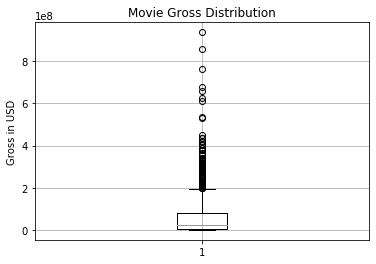

In [6]:
# I'll be using the median gross since it appears that outliers are present in the 'Gross_num' column
# I'll plot a boxplot to prove it

plt.boxplot(gross_num_nonull['Gross_num'])
plt.ylabel('Gross in USD')
plt.title('Movie Gross Distribution')
plt.grid()
plt.show()

In [7]:
# As seen from the results above, I'm going to use the median value instead

# Replace the NaN values with the median and converting the dtype to int

mv_rating_edit['Gross_num'] = mv_rating_edit['Gross_num'].fillna(median_gross_num)
mv_rating_edit['Gross_num'] = mv_rating_edit['Gross_num'].astype(int)

mv_rating_edit.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_num
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",4360000


In [8]:
# Check to see if the NaN values have been successfully filled in and if the dtype has changed

mv_rating_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
Poster_Link      1000 non-null object
Series_Title     1000 non-null object
Released_Year    1000 non-null object
Certificate      899 non-null object
Runtime_min      1000 non-null int32
Runtime          1000 non-null object
Genre            1000 non-null object
IMDB_Rating      1000 non-null float64
Overview         1000 non-null object
Meta_score       843 non-null float64
Director         1000 non-null object
Star1            1000 non-null object
Star2            1000 non-null object
Star3            1000 non-null object
Star4            1000 non-null object
No_of_Votes      1000 non-null int64
Gross            831 non-null object
Gross_num        1000 non-null int32
dtypes: float64(2), int32(2), int64(1), object(13)
memory usage: 132.9+ KB


#### Cleaning the 'Meta_score' column

For this part, I'll do the exact same thing with the one I did for the 'Gross_num' column.
I don't know if replacing the NaN values with the mean or median value is fair but so far this is
what I can think of.

Maybe by looking at the relationship between the meta score and imdb rating, I might be able
to at least approximate what the value of the meta score for a given movie with an NaN value will be.

Steps to accomplish this:
    1. Filter for non NaN values
    2. Take the mean or median
    3. Replace the NaN values with the chosen parameter (mean or median)

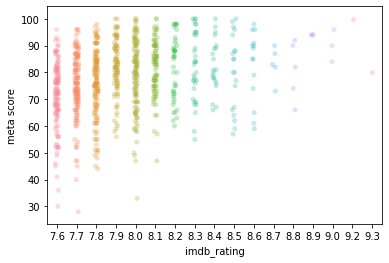

In [9]:
# Try to see the relationship between metascore and rating to fill in NaN value in the metascore column

sns.stripplot(x='IMDB_Rating', y='Meta_score', data=mv_rating_edit, jitter=True, alpha=0.3)
plt.xlabel('imdb_rating')
plt.ylabel('meta score')
plt.show()

From the result of the scatter plot above, it seems like imdb rating is more of a categorical variable rather than a continous
variable even after adding jitter. It doesn't tell anything if a higher imdb rating would mean a higher meta score. This means that I'll have to use either the mean or median to fill the NaN values of the meta score.

In [10]:
# Filter for non NaN values and check their mean and median values

metascore_nonull = mv_rating_edit[~mv_rating_edit['Meta_score'].isnull()]

mean_metascore = metascore_nonull['Meta_score'].mean()
median_metascore = metascore_nonull['Meta_score'].median()
print(f'mean meta score: {mean_metascore}\nmedian meta score: {median_metascore}')

mean meta score: 77.97153024911032
median meta score: 79.0


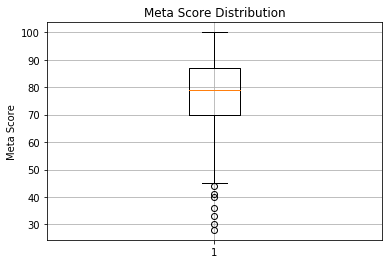

In [11]:
# The 'Meta_score' column seem to be normally distributed. I can use the mean value here since there
# seem to be very little or no outliers.

# I'll prove this by making a boxplot like I did with the 'Gross_num' column

plt.boxplot(metascore_nonull['Meta_score'])
plt.ylabel('Meta Score')
plt.title('Meta Score Distribution')
plt.grid()
plt.show()

In [12]:
# From the boxplot, the outliers seem to be few in number.
# In this case, I'll use the mean to replace the NaN values

# Replace NaN with the mean value
mv_rating_edit['Meta_score'] = mv_rating_edit['Meta_score'].fillna(round(mean_metascore))

# Check whether it works or not by using the info method
mv_rating_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
Poster_Link      1000 non-null object
Series_Title     1000 non-null object
Released_Year    1000 non-null object
Certificate      899 non-null object
Runtime_min      1000 non-null int32
Runtime          1000 non-null object
Genre            1000 non-null object
IMDB_Rating      1000 non-null float64
Overview         1000 non-null object
Meta_score       1000 non-null float64
Director         1000 non-null object
Star1            1000 non-null object
Star2            1000 non-null object
Star3            1000 non-null object
Star4            1000 non-null object
No_of_Votes      1000 non-null int64
Gross            831 non-null object
Gross_num        1000 non-null int32
dtypes: float64(2), int32(2), int64(1), object(13)
memory usage: 132.9+ KB


#### Dropping columns

Since there are columns that are not necessary for answering the questions that have already been presented above, I'll drop them.

From the info table above, the 'Poster_Link' column and the 'Gross' column will not be necessary since I'm not going to use the 'Poster_Link' column for the analysis as well as the 'Gross' column since I already have the 'Gross_num' column that was made previously.

In [13]:
# Dropping the 'Poster_Link' and 'Gross' columns

# Making a copy just in case if something goes wrong, I can still use the mv_rating_edit df

mv_rating_edit2 = mv_rating_edit.copy()

mv_rating_edit2 = mv_rating_edit2.drop(['Poster_Link', 'Gross'], axis=1)
mv_rating_edit2.head()

,Series_Title,Released_Year,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_num
0,The Shawshank Redemption,1994,A,142,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [14]:
mv_rating_edit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Series_Title     1000 non-null object
Released_Year    1000 non-null object
Certificate      899 non-null object
Runtime_min      1000 non-null int32
Runtime          1000 non-null object
Genre            1000 non-null object
IMDB_Rating      1000 non-null float64
Overview         1000 non-null object
Meta_score       1000 non-null float64
Director         1000 non-null object
Star1            1000 non-null object
Star2            1000 non-null object
Star3            1000 non-null object
Star4            1000 non-null object
No_of_Votes      1000 non-null int64
Gross_num        1000 non-null int32
dtypes: float64(2), int32(2), int64(1), object(11)
memory usage: 117.3+ KB


#### Cleaning the 'Certificate' column

As seen from the info table above, the df is almost cleaned up. The last thing that needs to be done is to deal with the 'Certificate' column since there are NaN values.

In [15]:
# Checking the unqiue values of the 'Certificate' column

mv_rating_edit2['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

After doing some research from __[IMDB help](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#)__, 
__[Stack Exchange](https://movies.stackexchange.com/questions/65430/what-are-the-meanings-of-the-terms-passed-and-approved-with-regards-to-a-mov)__, 
and __[Quora](https://www.quora.com/What-is-the-meaning-of-the-U-A-in-a-film-certificate?share=1)__, I assumed the following:<br>
same meaning:
- U = G
- UA = U/A
- PG = GP = TV-PG
- A = TV-MA
- Approved = Passed (assume that they mean the same thing)

Its own thing:
- TV-14
- PG-13
- 16
- R
- Unrated
- Passed

In [16]:
# Since there seem to be movie certificates that comes from different countries, some category
# mean the same thing, so I tried to change them into one category if their meaning is the same

mapping = {'U':'U',
           'G':'U',
           'U/A':'UA',
           'UA':'UA',
           'GP':'PG',
           'PG':'PG',
           'TV-PG':'PG', 
           'TV-MA':'A',
           'A':'A',
           'Passed':'Approved',
           'Approved':'Approved',
           'TV-14':'TV-14',
           'PG-13':'PG-13',
           'R':'R',
           'Unrated':'Unrated',
           'Passed':'Passed',
           '16':'16'}


# Create a new column called 'Certificate_new' and fill it with the mapped values

Certificate_new = mv_rating_edit2['Certificate'].map(mapping)
mv_rating_edit2.insert(mv_rating_edit2.columns.get_loc('Certificate'), 'Certificate_new', Certificate_new)
mv_rating_edit2.head()

,Series_Title,Released_Year,Certificate_new,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_num
0,The Shawshank Redemption,1994,A,A,142,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,A,175,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,UA,152,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,A,202,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,U,96,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


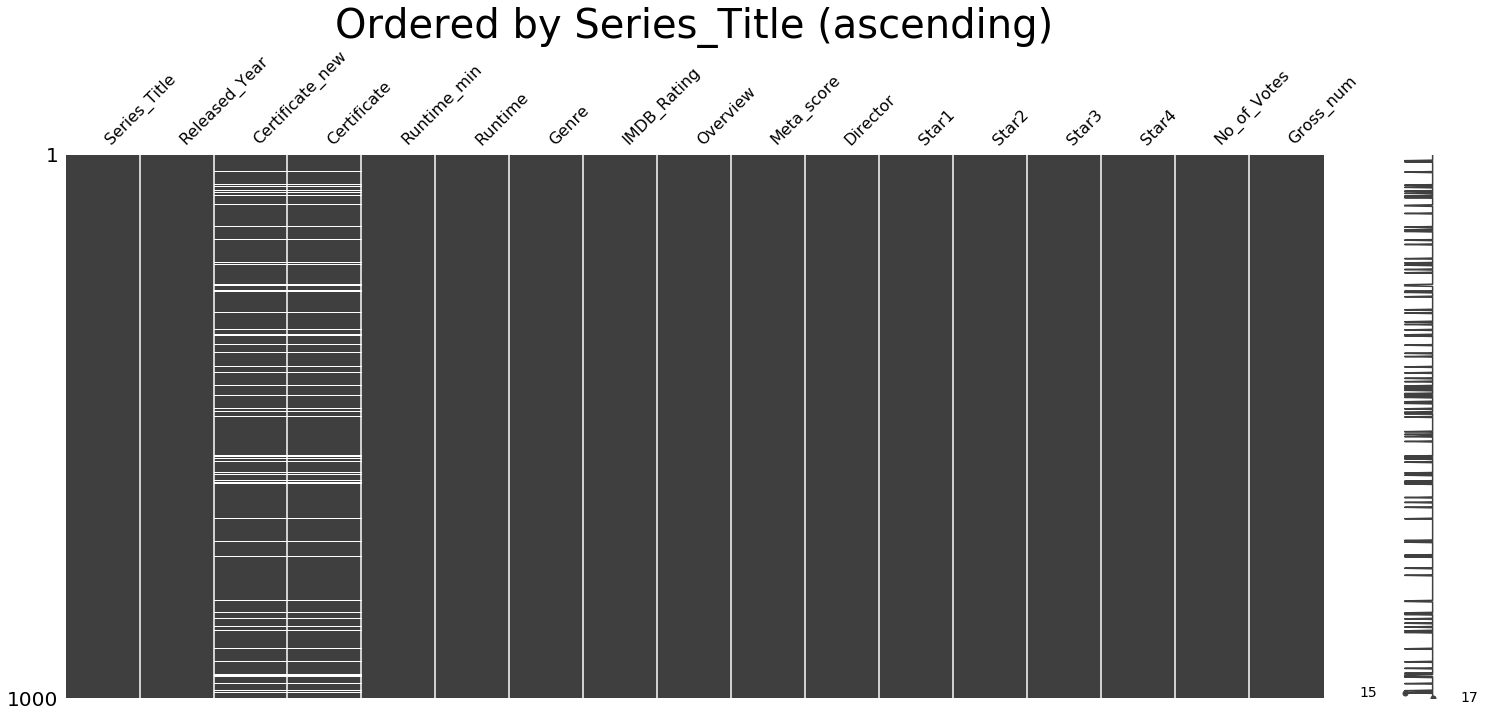

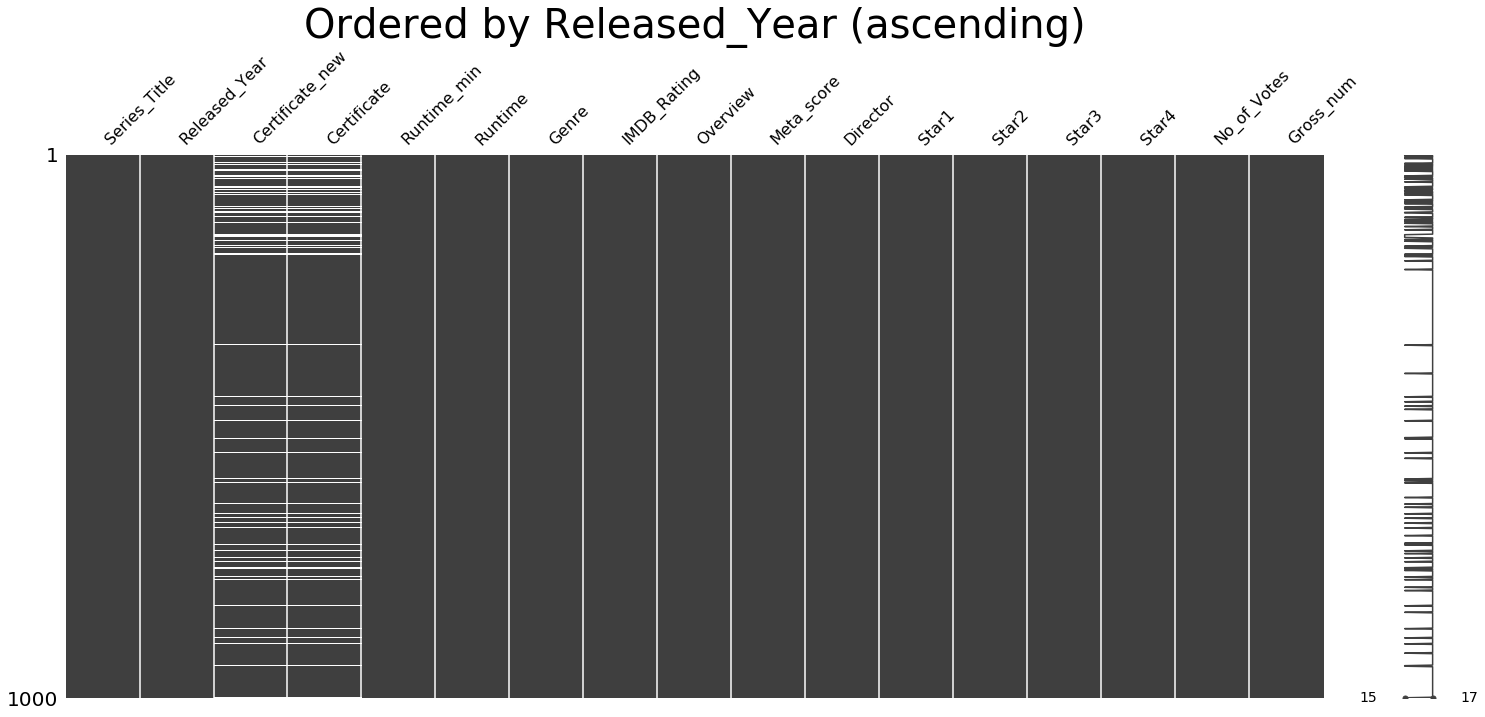

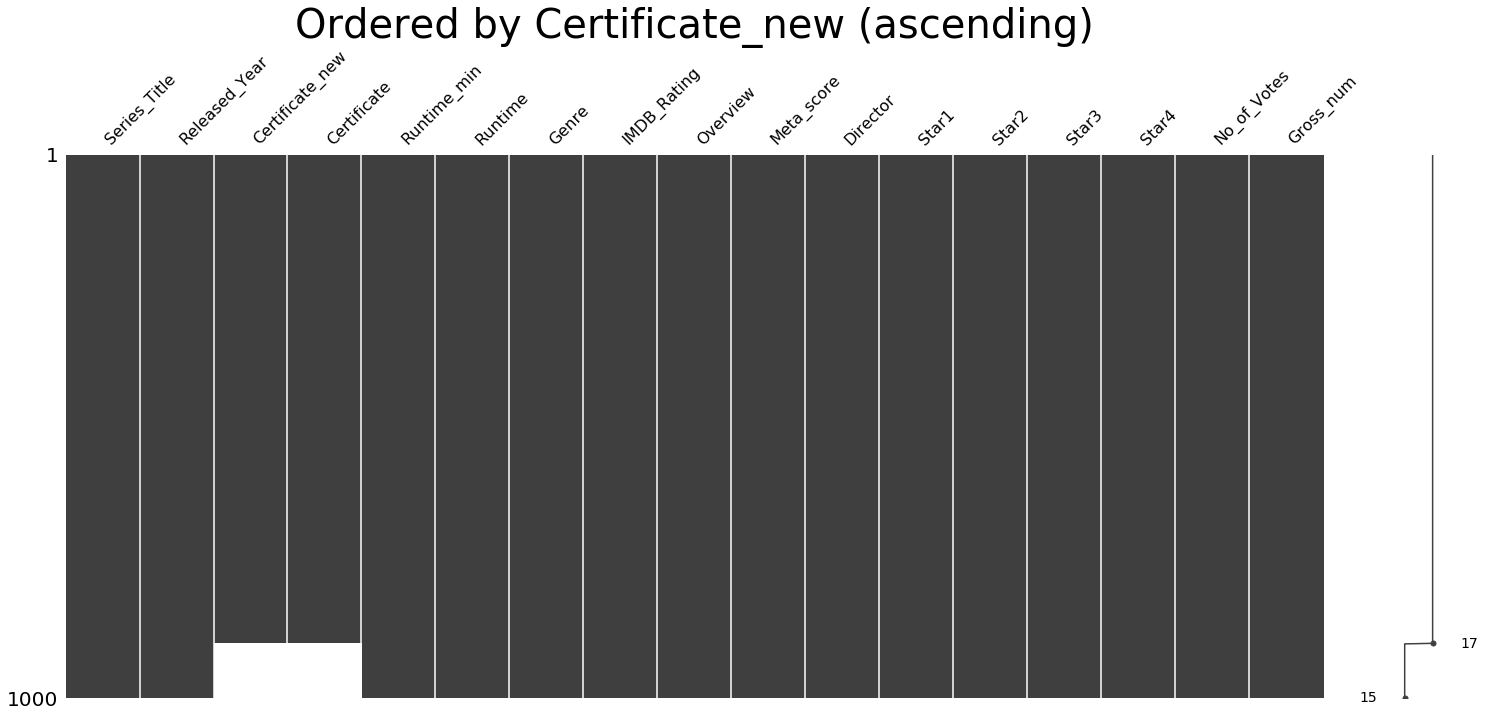

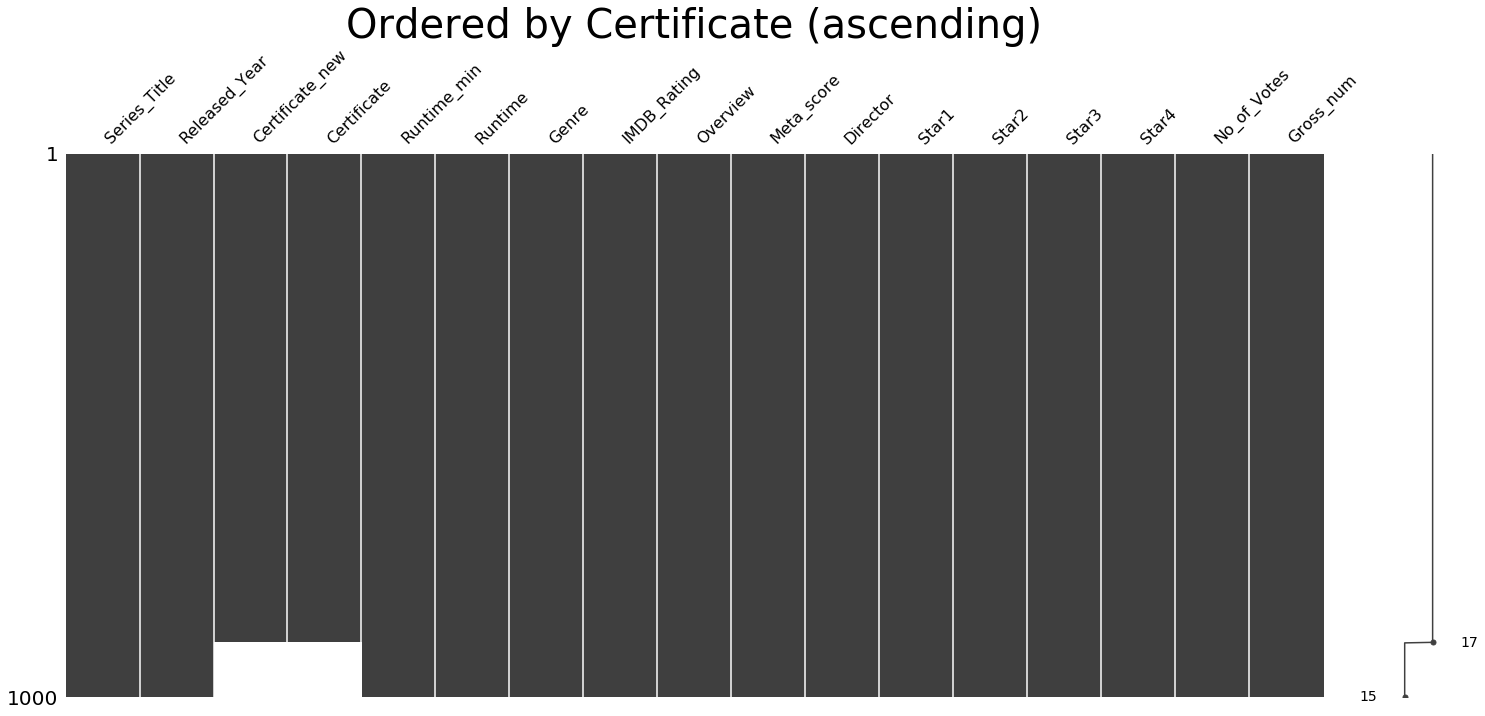

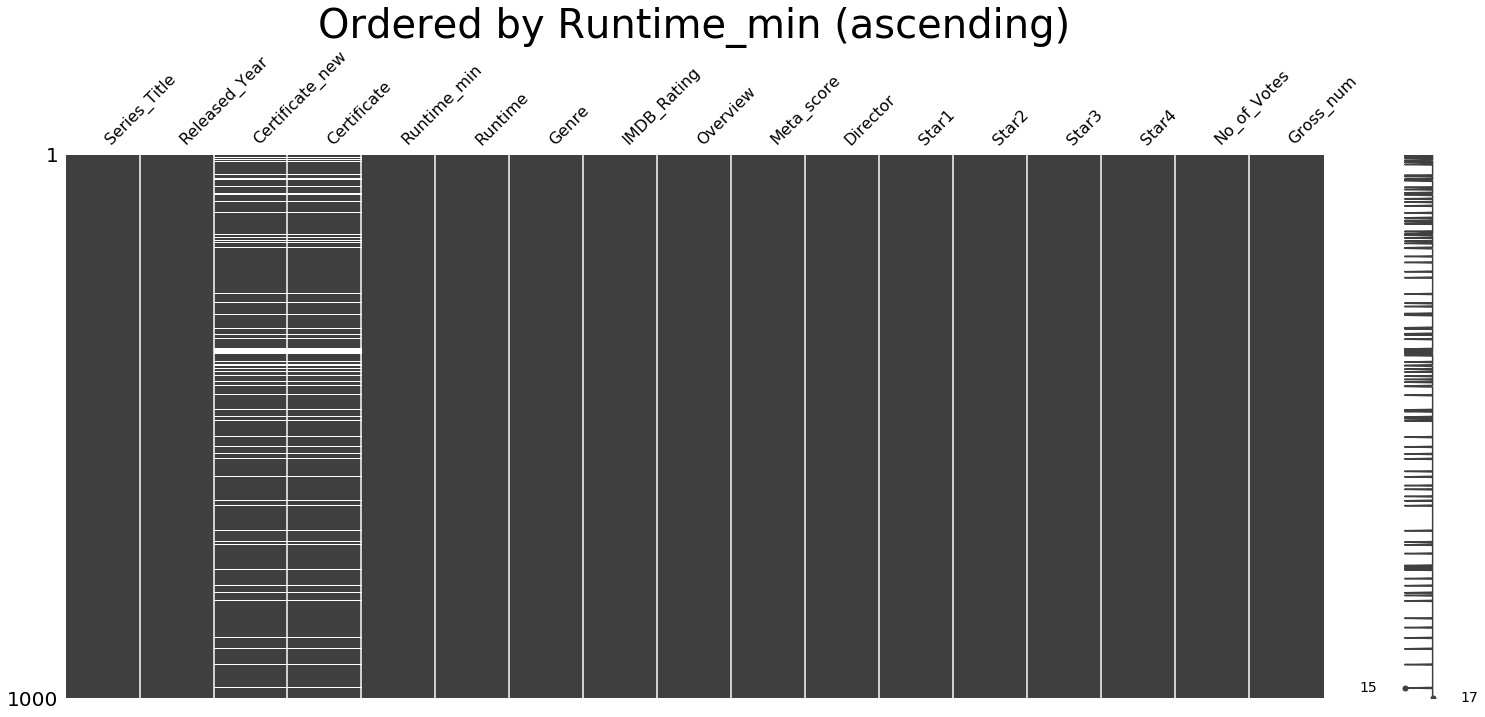

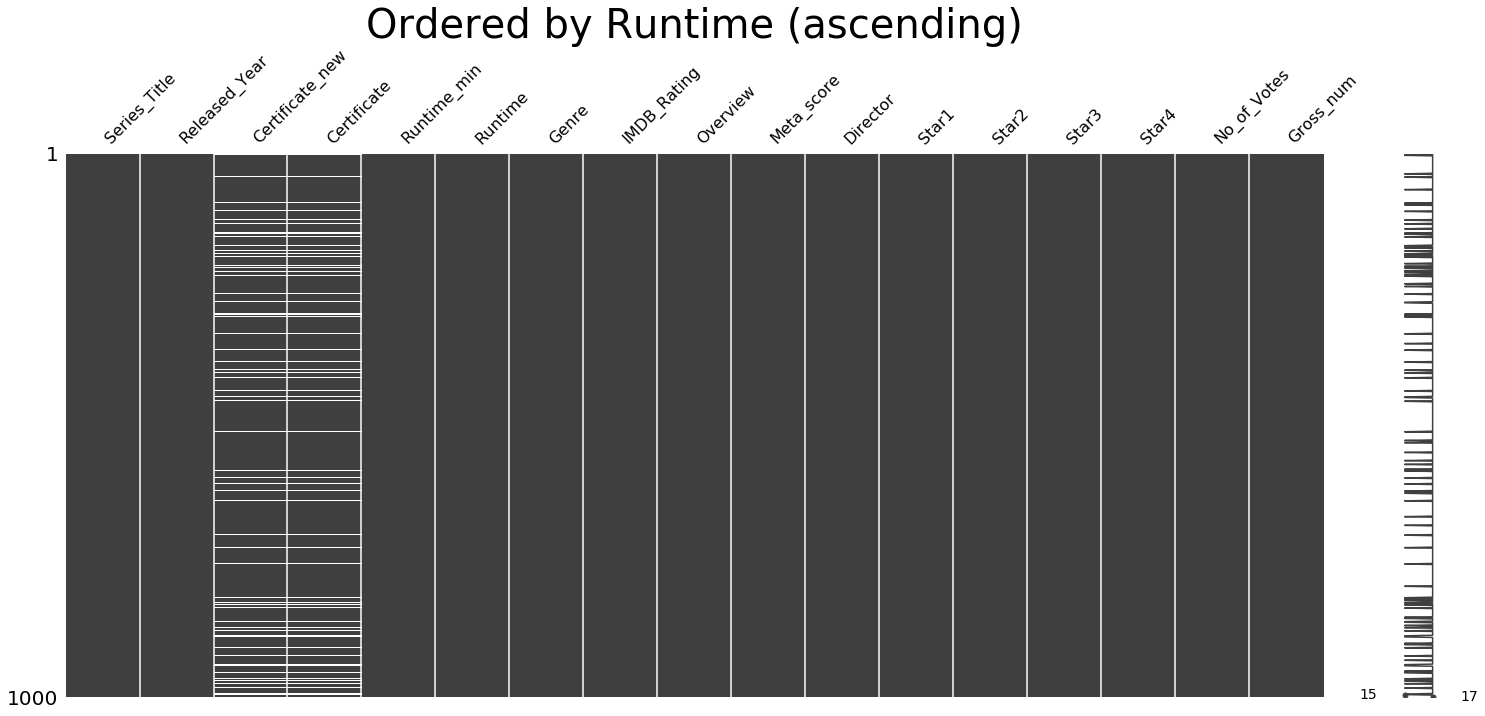

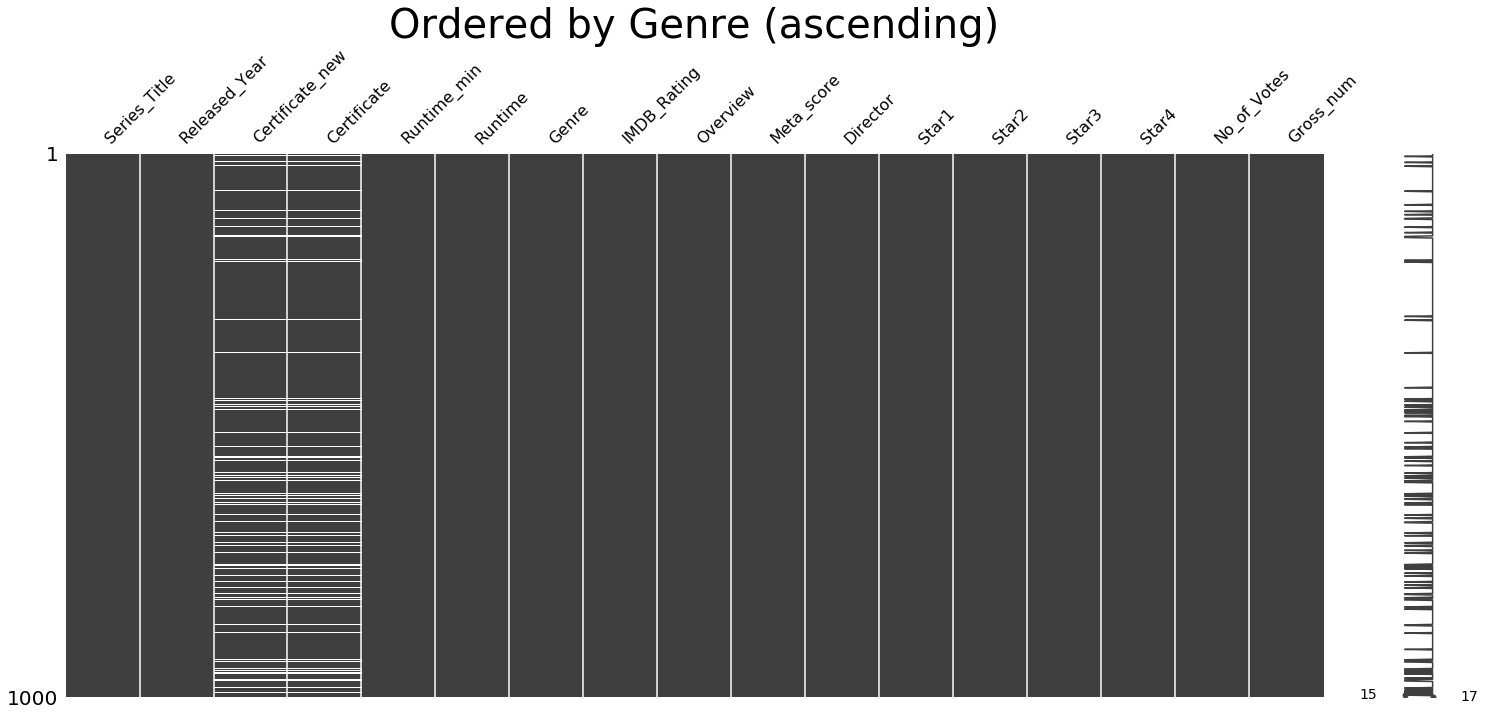

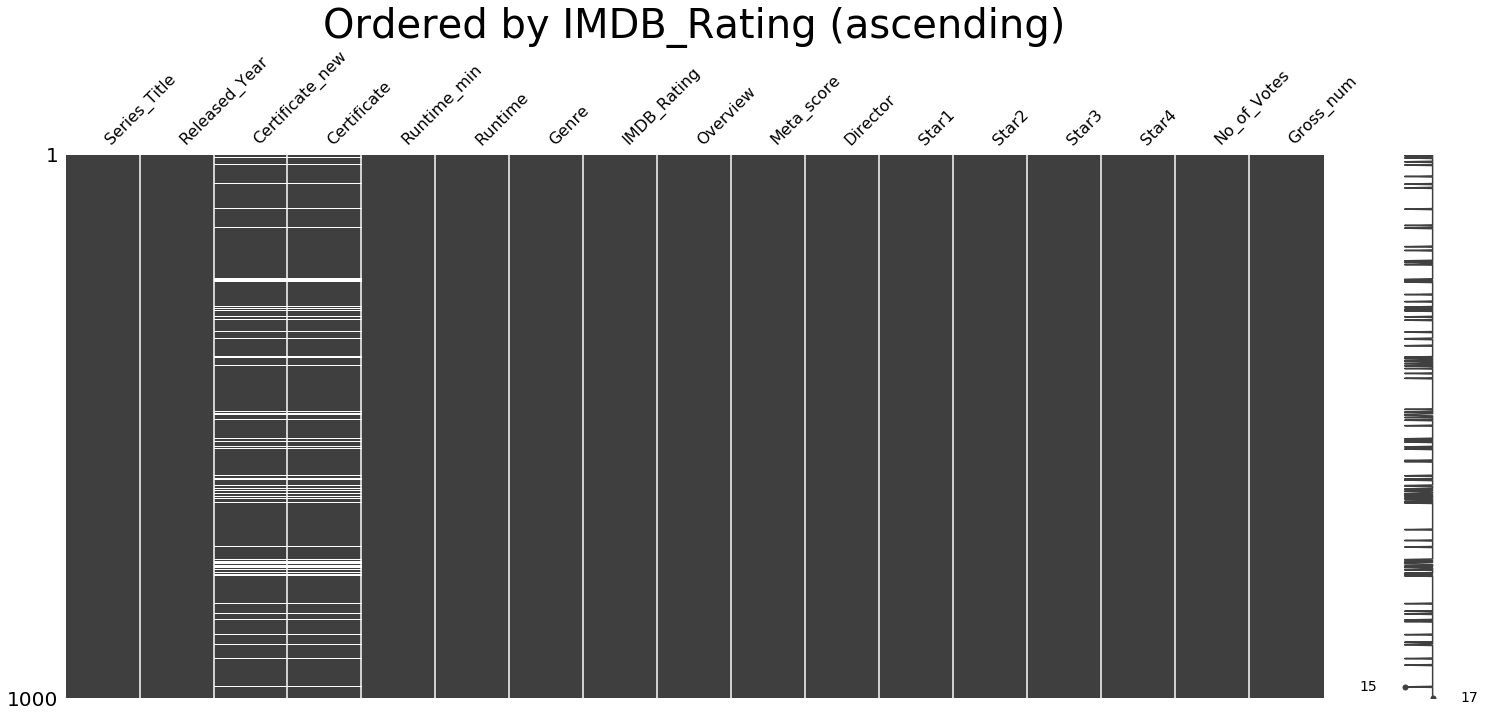

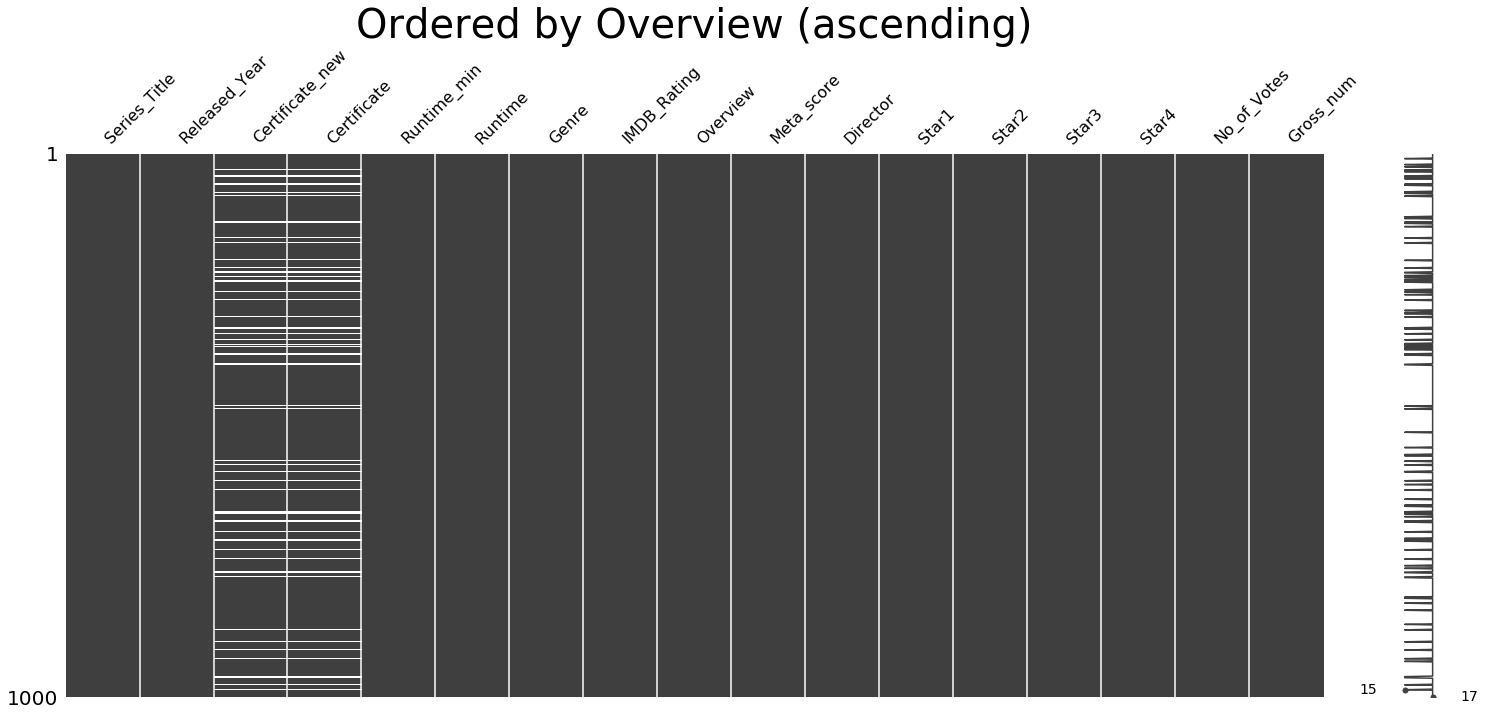

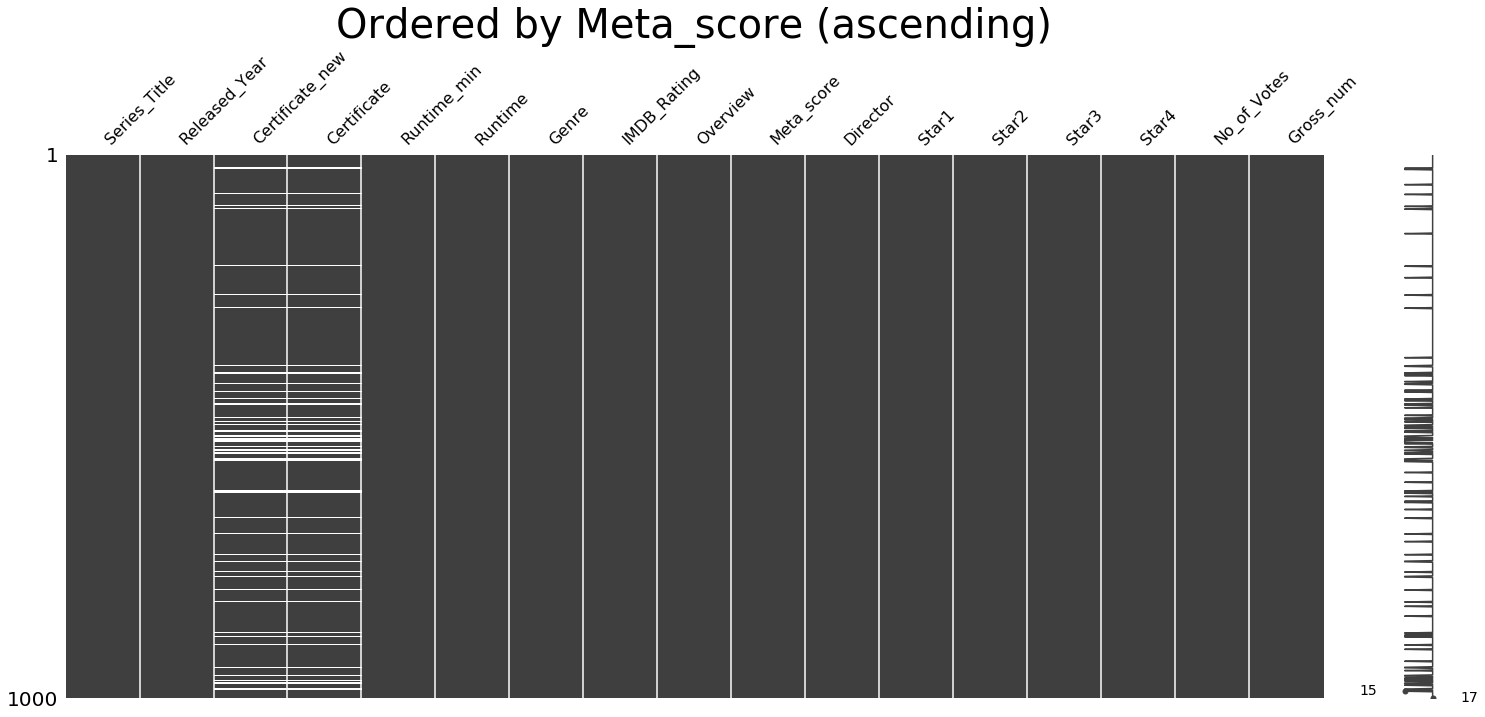

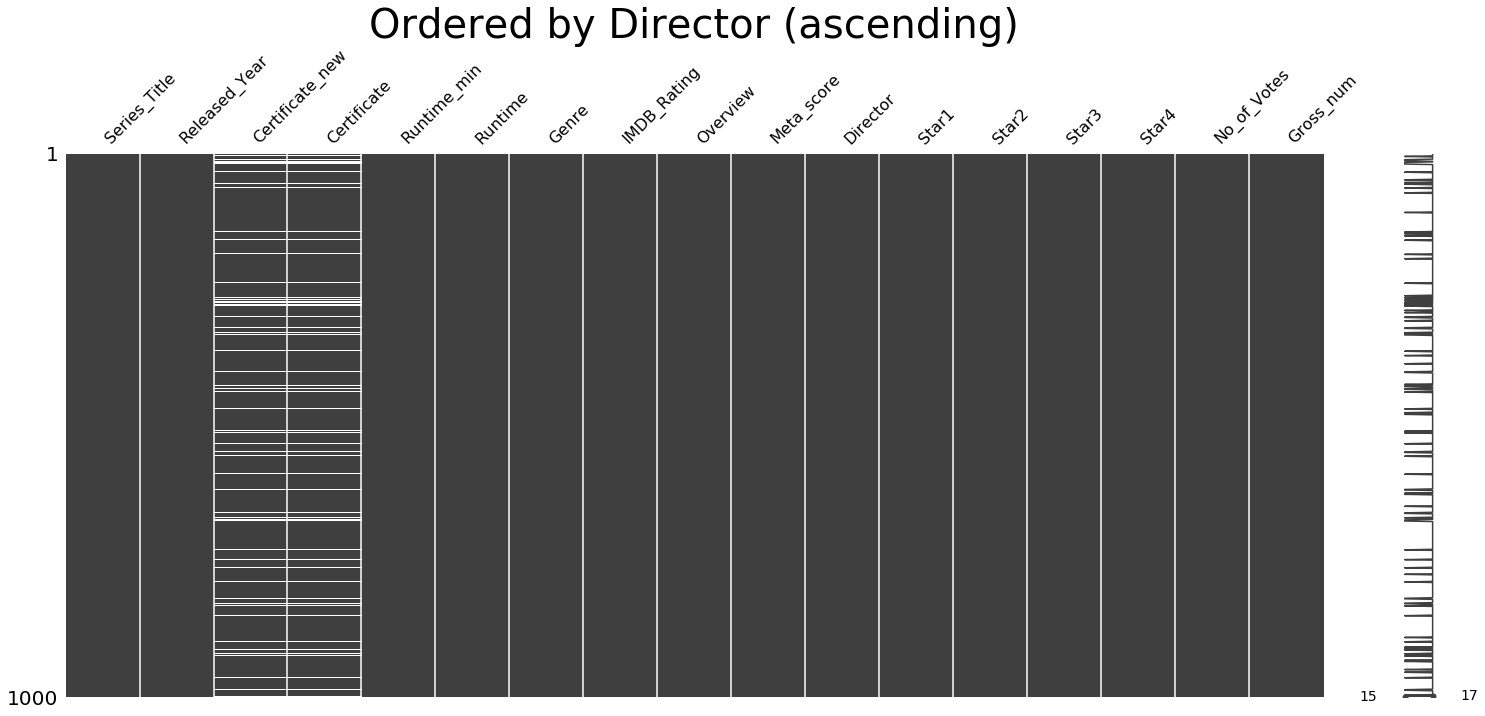

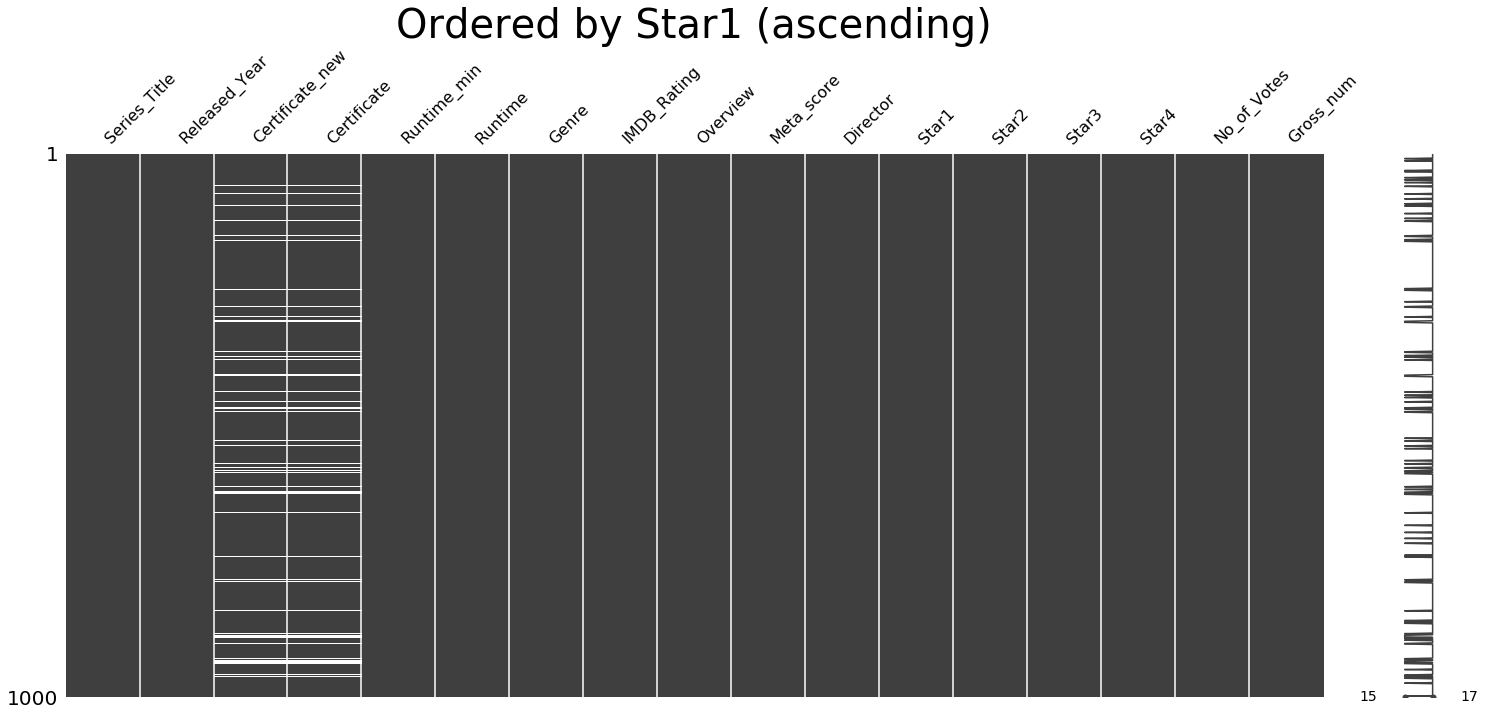

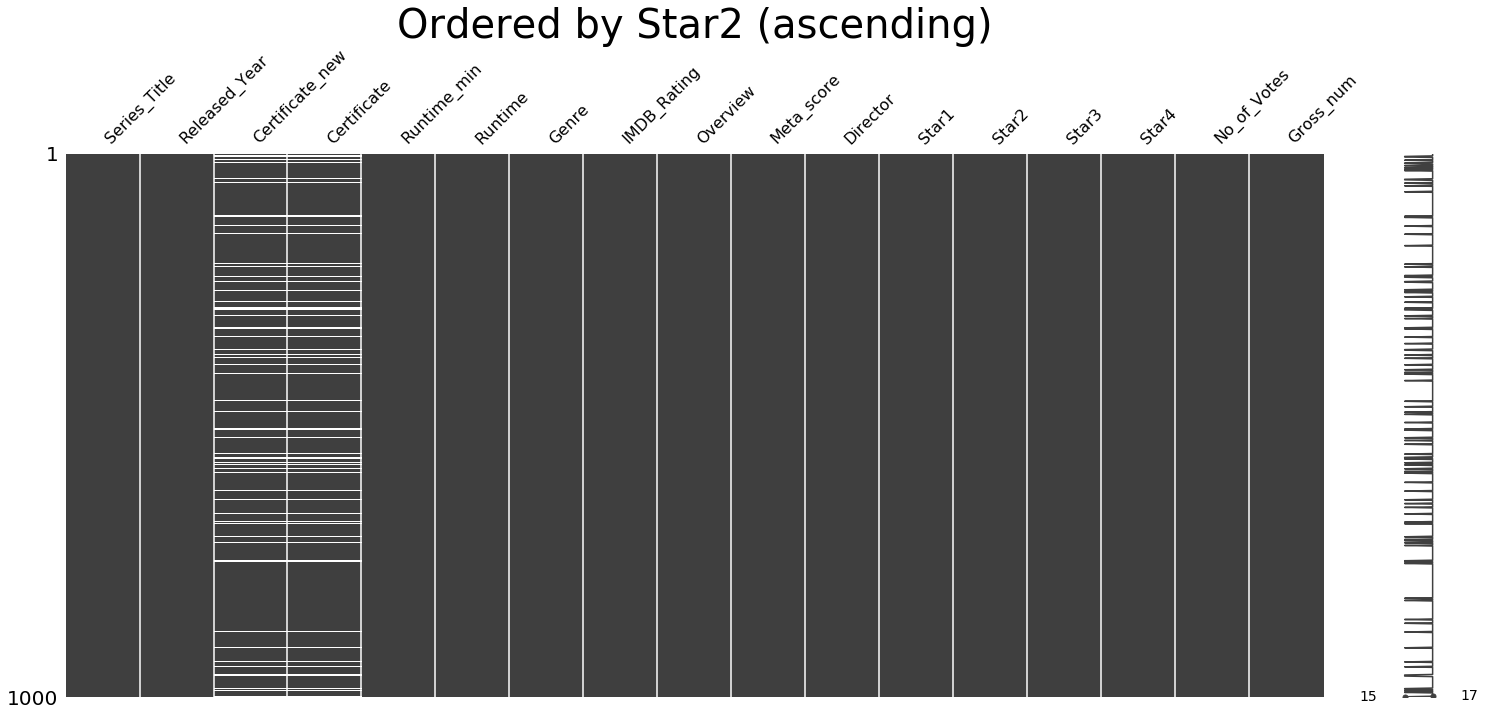

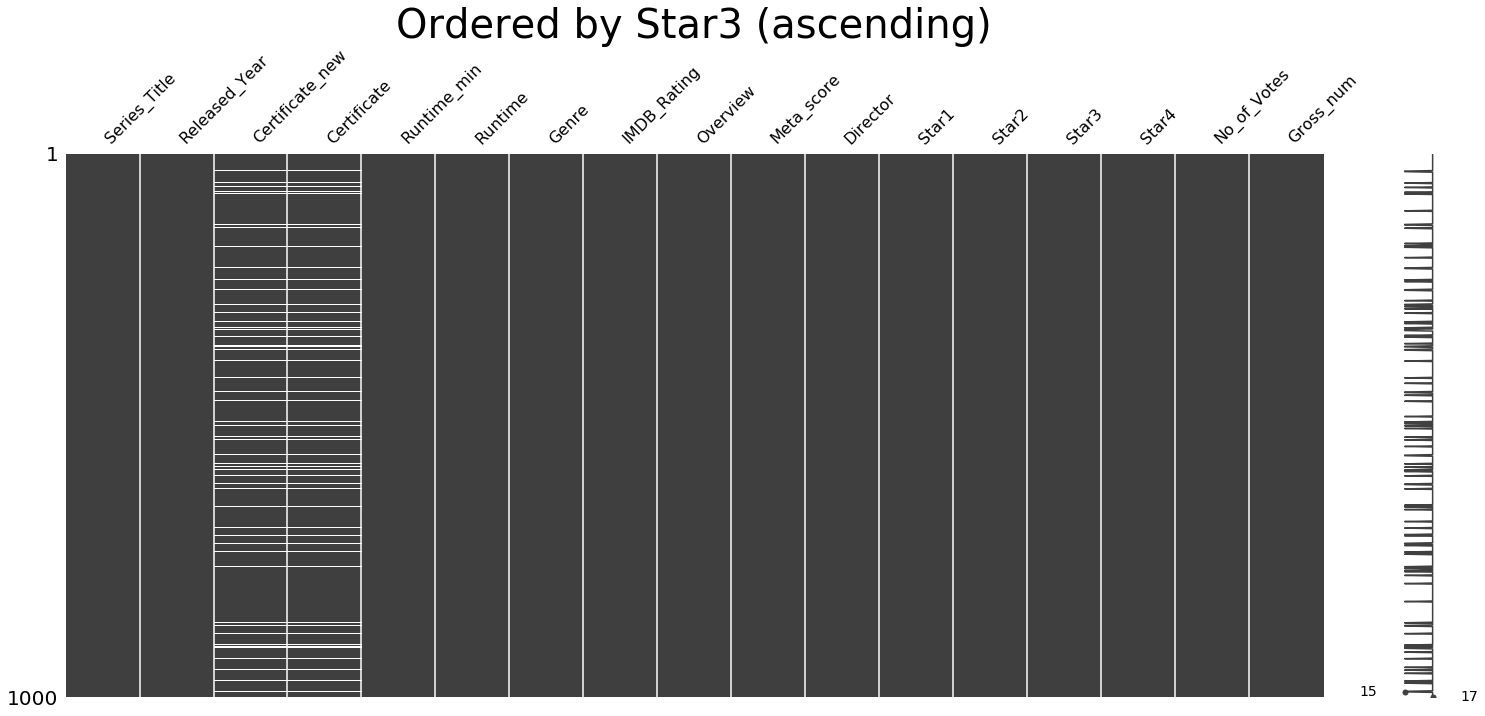

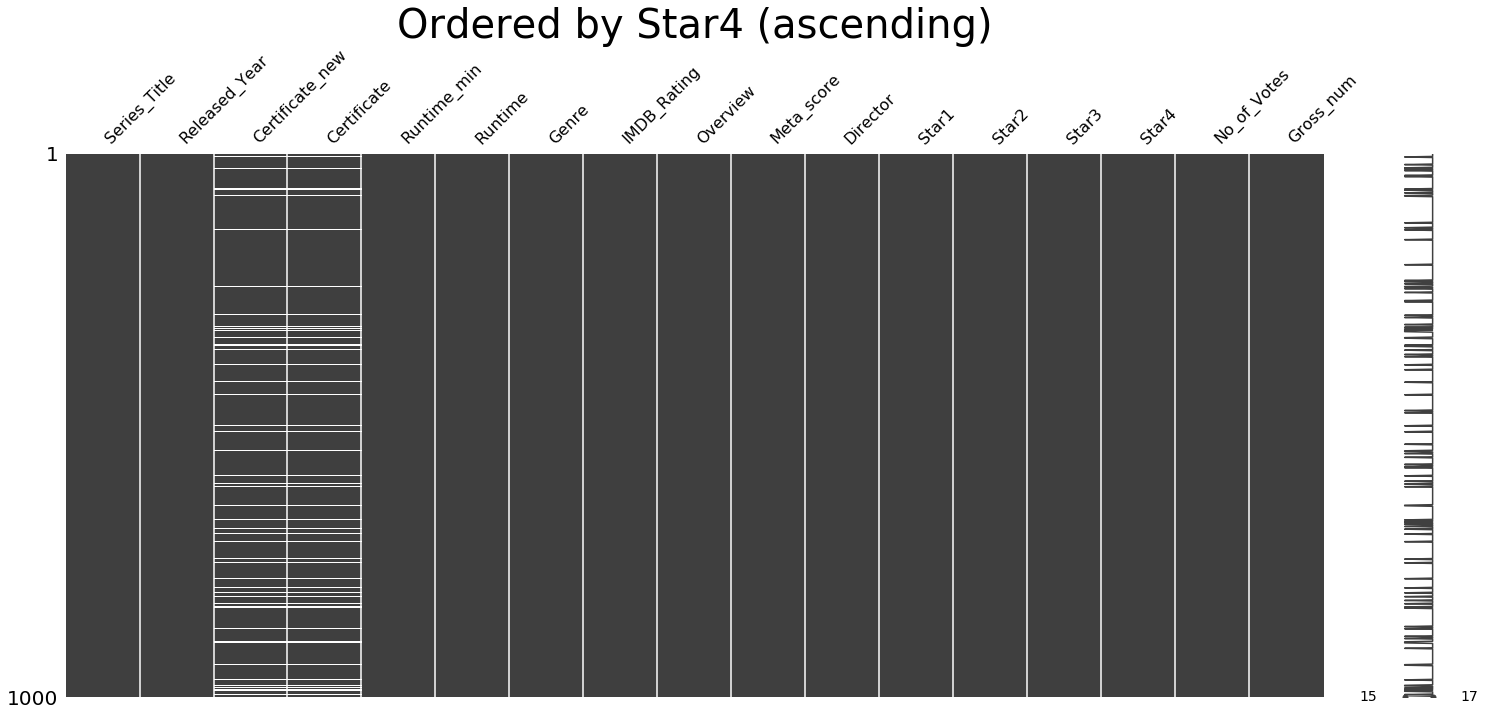

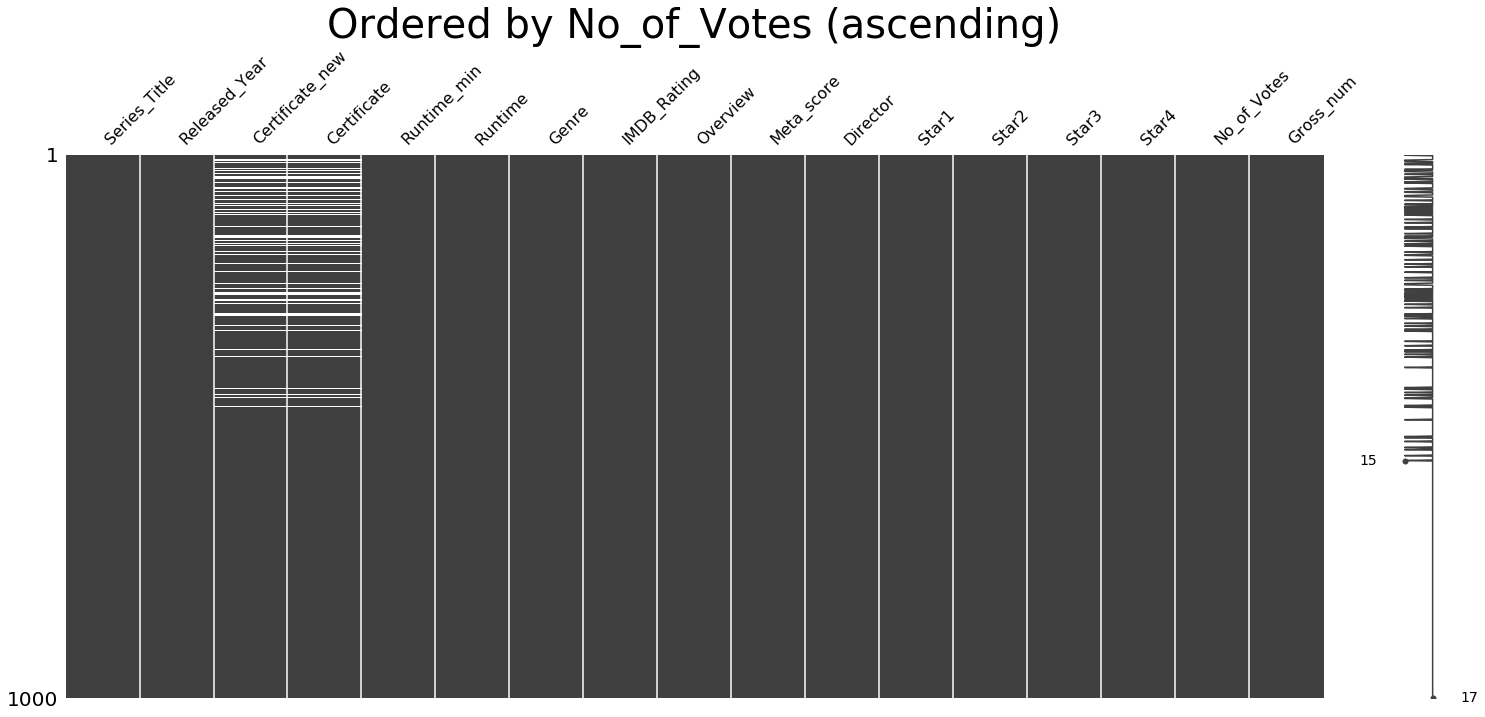

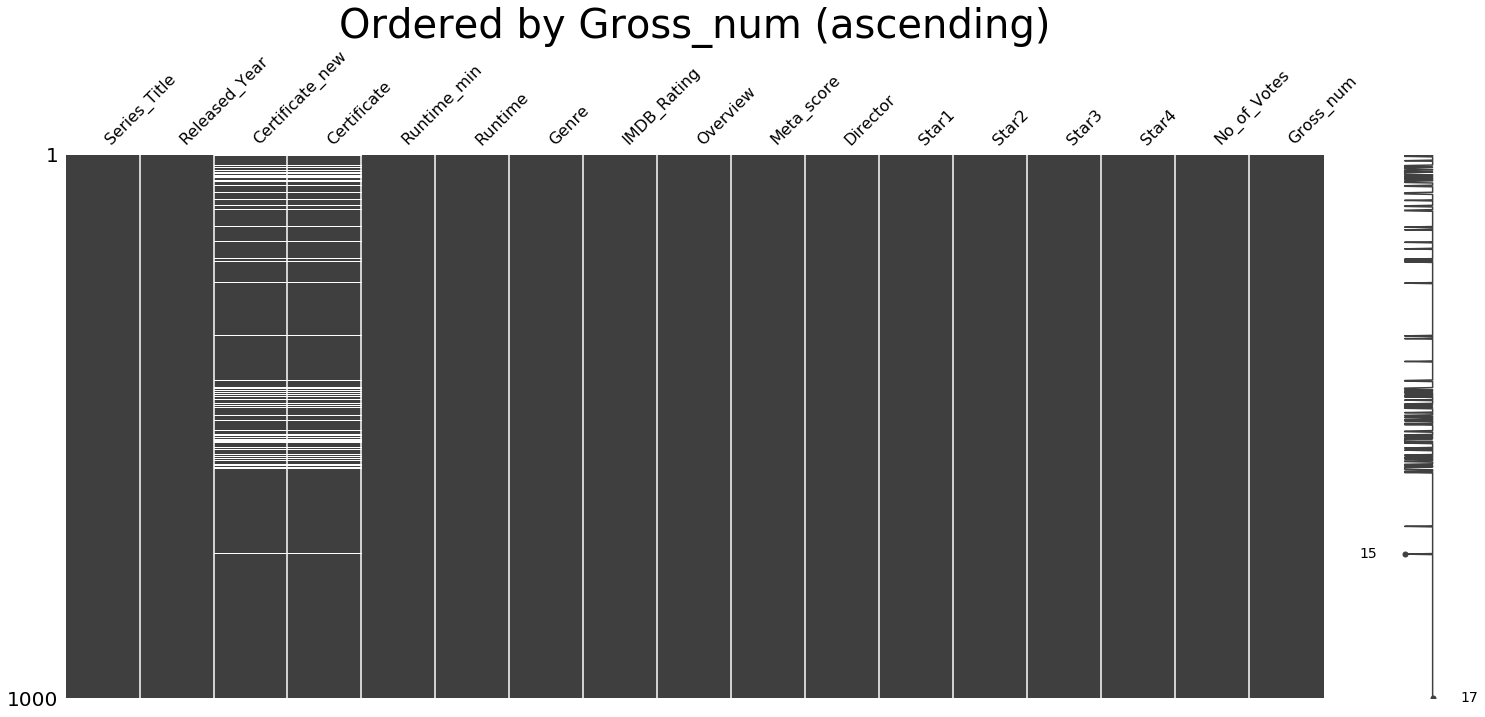

In [17]:
# Check to see if there are any patterns that causes a NaN value

colnames = mv_rating_edit2.columns

for colname in colnames:
    msno.matrix(mv_rating_edit2.sort_values(colname))
    plt.title('Ordered by ' + colname + ' (ascending)', fontsize=40)

From the figures above, the NaN values in the 'Certificate_new' column are spread out randomly but an interesting thing that can be observed is that in the 'Ordered by No_of_Votes (ascending)' figure, the NaN values seem to be clustered on top when compared with other figures. It seems like lower number of votes has something to do with the certification of a movie.

Unfortunately, I can't think of any method in order to deal with this one so I'm thinking about setting the NaN values to 'unknown' however, by setting it to 'unknown' it still doesn't tell anything when answering the questions that have been set above. Therefore, I'm thinking of dropping the NaN values since out of 1000 rows, there are only 111 missing observations (based on the info table). This means that there are still 899 observations (88.9% of the data) that can be used for analysis.

In [18]:
# Dropping NaN values from 'Certificate_new'

mv_rating_edit3 = mv_rating_edit2.dropna(axis=0).copy()
mv_rating_edit3.head()

,Series_Title,Released_Year,Certificate_new,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_num
0,The Shawshank Redemption,1994,A,A,142,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,A,175,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,UA,152,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,A,202,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,U,96,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [19]:
mv_rating_edit3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 997
Data columns (total 17 columns):
Series_Title       899 non-null object
Released_Year      899 non-null object
Certificate_new    899 non-null object
Certificate        899 non-null object
Runtime_min        899 non-null int32
Runtime            899 non-null object
Genre              899 non-null object
IMDB_Rating        899 non-null float64
Overview           899 non-null object
Meta_score         899 non-null float64
Director           899 non-null object
Star1              899 non-null object
Star2              899 non-null object
Star3              899 non-null object
Star4              899 non-null object
No_of_Votes        899 non-null int64
Gross_num          899 non-null int32
dtypes: float64(2), int32(2), int64(1), object(12)
memory usage: 119.4+ KB


#### Cleaning the 'Released_Year' column

For this part, I'll change the dtype from object to int. <br>
I'm not changing it to the datetime dtype because I only need the year.

In [20]:
# Look at the unique values

mv_rating_edit3['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1954',
       '1946', '2011', '2006', '2000', '1988', '1985', '1968', '1960',
       '1942', '1936', '1931', '2018', '2017', '2016', '2012', '2009',
       '2007', '1984', '1981', '1979', '1971', '1964', '1950', '1940',
       '2013', '2004', '1992', '1987', '1986', '1983', '1976', '1973',
       '1965', '1962', '1959', '1958', '1952', '1944', '1941', '1921',
       '2015', '2005', '1989', '1978', '1963', '1961', '1953', '1948',
       '1925', '1924', '1996', '1982', '1967', '1951', '1949', '1939',
       '1934', '1928', '1927', '1926', '1970', '1969', '1956', '1945',
       '1930', '1955', '1938', '1935', '1933', '1943', '1932', 'PG'],
      dtype=object)

There seem to be an error when inputing the 'Released_Year' column. From the array above, 'PG' can be seen at the last index of the array. Fortunately there's only one error which means that I can just find out what the movie title is and search in the internet about the release year and change it manually.

In [21]:
# Finding out the movie with a release year of 'PG'

mv_rating_edit3[mv_rating_edit3['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate_new,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_num
966,Apollo 13,PG,U,U,140,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


It looks like Apollo 13 is the one that has a release year of 'PG'. <br>
After searching on the imdb website, it appears that the release year of Apollo 13 was in the year 1995. <br><br>
The screenshot can be seen below:

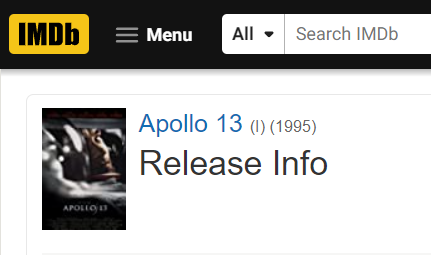

In [22]:
# Set the release year for Apollo 13  to 1995
# From the df above, the index of Apollo 13 is 966

mv_rating_edit3.loc[966, 'Released_Year'] = 1995
mv_rating_edit3[mv_rating_edit3['Series_Title'] == 'Apollo 13']

,Series_Title,Released_Year,Certificate_new,Certificate,Runtime_min,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_num
966,Apollo 13,1995,U,U,140,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [23]:
# After successfully changing the release year, I'll change the dtype to int
mv_rating_edit3['Released_Year'] = mv_rating_edit3['Released_Year'].astype(int)

mv_rating_edit3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 997
Data columns (total 17 columns):
Series_Title       899 non-null object
Released_Year      899 non-null int32
Certificate_new    899 non-null object
Certificate        899 non-null object
Runtime_min        899 non-null int32
Runtime            899 non-null object
Genre              899 non-null object
IMDB_Rating        899 non-null float64
Overview           899 non-null object
Meta_score         899 non-null float64
Director           899 non-null object
Star1              899 non-null object
Star2              899 non-null object
Star3              899 non-null object
Star4              899 non-null object
No_of_Votes        899 non-null int64
Gross_num          899 non-null int32
dtypes: float64(2), int32(3), int64(1), object(11)
memory usage: 155.9+ KB


#### Final dropping of columns

For the final part before the cleaning, I'll drop the 'Certificate', 'Runtime' columns because I already have the 'Certificate_new' and 'Runtime_min' columns

In [24]:
mv_rating_clean = mv_rating_edit3.copy()
mv_rating_clean = mv_rating_edit3.drop(['Certificate', 'Runtime'], axis=1)
mv_rating_clean.head()

,Series_Title,Released_Year,Certificate_new,Runtime_min,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_num
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


## Analysis

Now that the df is already clean, I can start answering the questions that were established previously.
        
#### Highest IMDB Rating
In this part, I'll find the movie with the highest all time rating and also the highest movie rating grouped by year.

In [25]:
# Highest imdb rated movie (all time)

at_high_rating = mv_rating_clean[mv_rating_clean['IMDB_Rating'] == mv_rating_clean['IMDB_Rating'].max()]
at_high_rating[['Released_Year', 'IMDB_Rating', 'Series_Title']].set_index('Released_Year')

,IMDB_Rating,Series_Title
Released_Year,,
1994,9.3,The Shawshank Redemption


In [26]:
# Highest imdb rated movie grouped by release year

high_rating_by_year = mv_rating_clean.groupby('Released_Year')['IMDB_Rating'].max()
high_rating_by_year = high_rating_by_year.sort_index().reset_index()
print(high_rating_by_year.to_string()) # to_string() used to display all the result

    Released_Year  IMDB_Rating
0            1921          8.3
1            1924          8.2
2            1925          8.2
3            1926          8.1
4            1927          8.1
5            1928          8.1
6            1930          8.0
7            1931          8.5
8            1932          7.8
9            1933          7.9
10           1934          8.1
11           1935          7.9
12           1936          8.5
13           1938          7.9
14           1939          8.1
15           1940          8.4
16           1941          8.3
17           1942          8.5
18           1943          7.8
19           1944          8.3
20           1945          8.0
21           1946          8.6
22           1948          8.2
23           1949          8.1
24           1950          8.4
25           1951          8.1
26           1952          8.3
27           1953          8.2
28           1954          8.6
29           1955          7.9
30           1956          8.0
31      

The result above only shows the highest rating given to a particular movie in each year. If the title of the movie is to be shown, it only shows one movie with that particular rating. 

ex: In the year 1924, the highest rating given to a particular movie is 8.2. If for example there are 2 movies with a rating of 8.2, it will only display the first movie that it encounters first.

Since I want to include every movie with the same rating, The result above will not suffice. The only way that I could think of solving this is by iterating using a for loop and put the result in a new dataframe shown on the code below.

In [27]:
# Putting all the values into a list
high_ratings = high_rating_by_year['IMDB_Rating'].tolist()
release_years = high_rating_by_year['Released_Year'].tolist()

# Empty list for appending the result of the for loop
movie_list = []

for rating, year in zip(high_ratings, release_years):
    res = mv_rating_clean[(mv_rating_clean['Released_Year'] == year) & (mv_rating_clean['IMDB_Rating'] == rating)]
    movie_list.append(res)

# Concatenating the values in the list into a dataframe
high_rated_movies_by_year = pd.concat(movie_list) 
high_rated_movies_by_year = high_rated_movies_by_year[['Released_Year', 'IMDB_Rating', 'Series_Title']].set_index('Released_Year')
print(high_rated_movies_by_year.to_string())

               IMDB_Rating                                       Series_Title
Released_Year                                                                
1921                   8.3                                            The Kid
1924                   8.2                                       Sherlock Jr.
1925                   8.2                                      The Gold Rush
1926                   8.1                                        The General
1927                   8.1                      Sunrise: A Song of Two Humans
1928                   8.1                         La passion de Jeanne d'Arc
1928                   8.1                                         The Circus
1930                   8.0                     All Quiet on the Western Front
1931                   8.5                                        City Lights
1932                   7.8                  Scarface: The Shame of the Nation
1933                   7.9                                      

As seen on the results shown above, I've managed to find the name of movies which has the highest rating for a given year. Unlike the previous code which only gives one movie title with the highest rating in each year, this code gives all of the movies which has the highest rating for each year.


While looking at the code before the one above, I suddenly got curious about the trend of the highest rated movies over time, so I decided to do a small side quest by plotting a line graph as seen below.

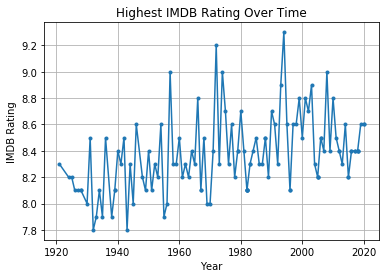

In [28]:
# Plot a graph to show the trend of highest movie rating over time

plt.plot(high_rated_movies_by_year.index, high_rated_movies_by_year.IMDB_Rating, marker='.')
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('Highest IMDB Rating Over Time')
plt.grid()
plt.show()

From the graph above, the graph shows fluctuations of the highest rated movies over time from the year 1920 to 2020. However, the overall trend of this graph is going up or in other words, the highest rating keeps on increasing as time goes by.

While this is an interesting information to have, in my opinion, it doesn't tell the overall story about how movies are doing for a given year. I personally think that taking the median of the ratings will help in giving a bigger picture of how these movies are doing.

I decided to take the median here since it's more robust to outliers in case if outliers are present.

In [29]:
# Taking the median 

mid_movie_rating_by_year = mv_rating_clean.groupby('Released_Year')['IMDB_Rating'].median().reset_index()
print(mid_movie_rating_by_year.to_string())

    Released_Year  IMDB_Rating
0            1921         8.30
1            1924         8.20
2            1925         8.20
3            1926         8.10
4            1927         8.10
5            1928         8.10
6            1930         8.00
7            1931         8.30
8            1932         7.80
9            1933         7.80
10           1934         8.05
11           1935         7.90
12           1936         8.50
13           1938         7.85
14           1939         8.05
15           1940         8.00
16           1941         8.30
17           1942         8.35
18           1943         7.80
19           1944         8.00
20           1945         7.95
21           1946         7.90
22           1948         8.00
23           1949         8.05
24           1950         8.20
25           1951         7.90
26           1952         7.90
27           1953         8.10
28           1954         8.20
29           1955         7.80
30           1956         7.90
31      

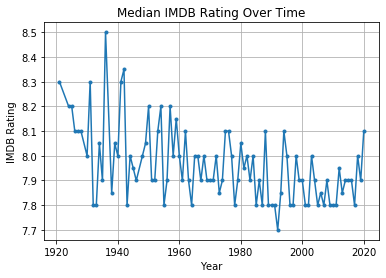

In [30]:
# Plotting the median of the ratings over time

plt.plot(mid_movie_rating_by_year.Released_Year, mid_movie_rating_by_year.IMDB_Rating, marker='.')
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('Median IMDB Rating Over Time')
plt.grid()
plt.show()

In contrast with the previous graph, it seems like the overall trend is going down or in other words, the average rating of movies tend to have a lower rating than the previous year.

#### Highest Meta Score 

In this part, I'll answer the second bullet point about movies with the highest all time meta score and movies with the highest meta score grouped by year.

In [31]:
# Movie with the highest all time meta score

at_high_ms = mv_rating_clean[mv_rating_clean['Meta_score'] == mv_rating_clean['Meta_score'].max()]
at_high_ms = at_high_ms[['Released_Year', 'Meta_score', 'Series_Title']].set_index('Released_Year').sort_index()
at_high_ms

,Meta_score,Series_Title
Released_Year,,
1941,100.0,Citizen Kane
1942,100.0,Casablanca
1946,100.0,Notorious
1954,100.0,Rear Window
1957,100.0,Sweet Smell of Success
1958,100.0,Vertigo
1962,100.0,Lawrence of Arabia
1970,100.0,Il conformista
1972,100.0,The Godfather


In [32]:
f'No. of movies: {len(at_high_ms)}'

'No. of movies: 12'

There appears to be 12 movies with a meta score of 100 ranging from 1941 to 2014. This is actually pretty interesting to me since I didn't expect any movie to have a meta score of 100 and it also surprises me to see 12 movies that has a meta score of 100.

Now I'm going to find out movies with the highest meta score per year.

In [33]:
# Highest meta score grouped by year

high_ms_by_year = mv_rating_clean.groupby('Released_Year')['Meta_score'].max()
high_ms_by_year = high_ms_by_year.sort_index().reset_index()
print(high_ms_by_year.to_string())

    Released_Year  Meta_score
0            1921        78.0
1            1924        78.0
2            1925        78.0
3            1926        78.0
4            1927        78.0
5            1928        90.0
6            1930        91.0
7            1931        99.0
8            1932        87.0
9            1933        90.0
10           1934        87.0
11           1935        78.0
12           1936        96.0
13           1938        97.0
14           1939        97.0
15           1940        96.0
16           1941       100.0
17           1942       100.0
18           1943        94.0
19           1944        95.0
20           1945        92.0
21           1946       100.0
22           1948        98.0
23           1949        97.0
24           1950        98.0
25           1951        97.0
26           1952        99.0
27           1953        85.0
28           1954       100.0
29           1955        89.0
30           1956        94.0
31           1957       100.0
32        

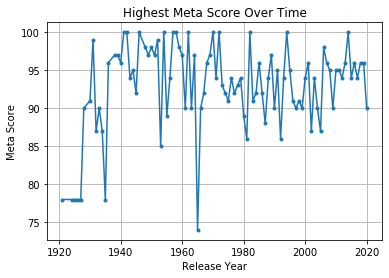

In [34]:
# Same as before, I'll make a line graph to see the visualization of the data above.

plt.plot(high_ms_by_year['Released_Year'], high_ms_by_year['Meta_score'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Meta Score')
plt.title('Highest Meta Score Over Time')
plt.grid()
plt.show()

I find this graph to be very interesting because when looking at the overall trend, the graph is fluctuating all throughout the year that the trend looks stagnant. I can't really tell if the trend is going up or going down. From 1920 to 1940, an upward trend can be observed before the meta score falls to the exact point where it started from in the late 1930s before going up again. From there the trend fluctuates that it looks like the trend is stagnant except for the outlier in the mid 1960s.

Before moving on to the finding the movie names, I'm curious about the meta score of the outlier. So before moving on, I'll find out the meta score of the outlier first.

In [35]:
# Finding out the outlier's movie title

high_out_ms_by_year = mv_rating_clean.groupby('Released_Year')['Meta_score'].max().reset_index()
high_out_ms_by_year[high_out_ms_by_year['Meta_score'] == high_out_ms_by_year['Meta_score'].min()]

,Released_Year,Meta_score
39,1965,74.0


It seems like the meta score of the outlier is 74. Now I'm going to find out the name of the movies with the highest meta score in each year and find out the movie name with the meta score of 74. But before that I'll plot a graph about the meta score median of each year.

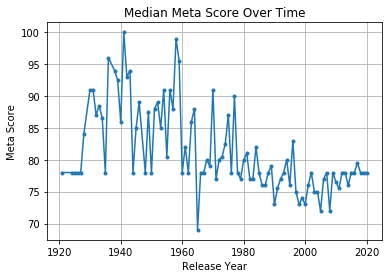

In [36]:
# Plotting median graph
median_ms = mv_rating_clean.groupby('Released_Year')['Meta_score'].median().reset_index()
median_ms

plt.plot(median_ms.Released_Year, median_ms.Meta_score, marker='.')
plt.xlabel('Release Year')
plt.ylabel('Meta Score')
plt.title('Median Meta Score Over Time')
plt.grid()
plt.show()

From the graph above, the trend is clearly going down as time goes by. If we relate this with the median of the imdb rating, they seem to share the same trend. I'll further investigate this by making a scatter plot to see if they are correlated or not.

This is actually out of the scope of the questions presented previously, but I think that it will be interesting to check this out.

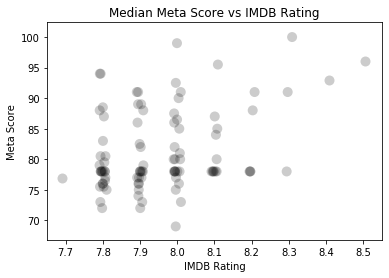

In [37]:
# scatter plot of meta score vs imdb rating median values

new_df = pd.DataFrame(columns=['IMDB_Rating', 'Meta_score'])
new_df['IMDB_Rating'] = round(mid_movie_rating_by_year.IMDB_Rating, 1)
new_df['Meta_score'] = median_ms.Meta_score


sns.stripplot(x='IMDB_Rating', y='Meta_score', data=new_df, jitter=True, alpha=0.2, size=10, color='black')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('Median Meta Score vs IMDB Rating')
plt.show()

In [38]:
# Correlation coefficient of meta score and imdb rating

new_df.corr()

,IMDB_Rating,Meta_score
IMDB_Rating,1.000000,0.346163
Meta_score,0.346163,1.000000


At first glance, it looks like meta score and imdb rating are correlated in some way. After finding out the correlation coefficient however, the correlation between both of them is very weak which means that as imdb rating increases, it is not guaranteed that the meta score will increase also.

In [39]:
# Finding the movie names with the highest meta score in each year

ms_list = high_ms_by_year['Meta_score'].tolist()
year_list = high_ms_by_year['Released_Year'].tolist()

moviename_ms_list = []

for ms, year in zip(ms_list, year_list):
    res = mv_rating_clean[(mv_rating_clean['Released_Year'] == year) & (mv_rating_clean['Meta_score'] == ms)]
    moviename_ms_list.append(res)
    
final_ms_df = pd.concat(moviename_ms_list).set_index('Released_Year')
final_ms_df = final_ms_df[['Meta_score', 'Series_Title']]
print(final_ms_df.to_string())

               Meta_score                                       Series_Title
Released_Year                                                               
1921                 78.0                                            The Kid
1924                 78.0                                       Sherlock Jr.
1925                 78.0                                      The Gold Rush
1926                 78.0                                        The General
1927                 78.0                      Sunrise: A Song of Two Humans
1928                 90.0                                         The Circus
1930                 91.0                     All Quiet on the Western Front
1931                 99.0                                        City Lights
1932                 87.0                  Scarface: The Shame of the Nation
1933                 90.0                                          King Kong
1934                 87.0                              It Happened One Night

In [40]:
# Finding out the movie with a meta score of 74 (lowest among the rest)

final_ms_df[final_ms_df['Meta_score'] == 74.0]

,Meta_score,Series_Title
Released_Year,,
1965,74.0,Per qualche dollaro in più


It appears that 'Per qualche dollaro in più' has the lowest meta score among the other movies.

Note: I just realized that I'll be writing the same code over and over again. So starting from now, I'll make a function to find movie names to avoid writing the same thing over and over again.

In [41]:
# Function for finding movie name

def movie_finder(Series_year, Series_var, year_title, var_title):
    year_list = Series_year.tolist()
    var_list = Series_var.tolist()
    
    result_list = []
    
    for year, var in zip(year_list, var_list):
        res = mv_rating_clean[(mv_rating_clean[year_title] == year) & (mv_rating_clean[var_title] == var)]
        result_list.append(res)
        
    final_df = pd.concat(result_list)
    return final_df

#### Highest No. of Votes

Now I'm going to start answering the question about movies with the highest all time votes and also movies with the highest votes for each year.

In [42]:
# Movie with the highest all time votes

at_high_vote = mv_rating_clean[mv_rating_clean['No_of_Votes'] == mv_rating_clean['No_of_Votes'].max()]
at_high_vote[['Series_Title', 'No_of_Votes']]

,Series_Title,No_of_Votes
0,The Shawshank Redemption,2343110


It looks like 'The Shawshank Redemption' has the highest number of votes all time with a values of 2,343,110 votes.

In [43]:
# Movies with the highest votes by year

h_vote_by_year = mv_rating_clean.groupby('Released_Year').max().reset_index()

high_voted_movies = movie_finder(h_vote_by_year['Released_Year'], h_vote_by_year['No_of_Votes'], 
                                 'Released_Year', 'No_of_Votes')
high_voted_movies = high_voted_movies[['Released_Year', 'Series_Title', 'No_of_Votes']].set_index('Released_Year')
print(high_voted_movies.to_string())

                                                    Series_Title  No_of_Votes
Released_Year                                                                
1921                                                     The Kid       113314
1924                                                Sherlock Jr.        41985
1925                                               The Gold Rush       101053
1926                                                 The General        81156
1927                               Sunrise: A Song of Two Humans        46865
1928                                  La passion de Jeanne d'Arc        47676
1930                              All Quiet on the Western Front        57318
1931                                                 City Lights       167839
1932                           Scarface: The Shame of the Nation        25312
1933                                                   King Kong        78991
1934                                       It Happened One Night

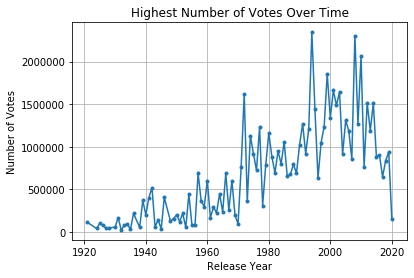

In [44]:
# Plotting line graph of number of votes over time grouped by year

plt.plot(high_voted_movies.index, high_voted_movies['No_of_Votes'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Number of Votes')
plt.title('Highest Number of Votes Over Time')
plt.grid()
plt.show()

As seen above, the overall trend of the highest number of votes increases over time and drops starting from approximately the year 2010 up to 2020.

Now I'm going to take the median number of votes in each year and plot it to compare with the graph above.

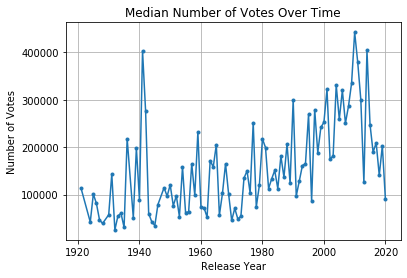

In [45]:
# Median number of votes grouped by year

median_vote_by_year = mv_rating_clean.groupby('Released_Year').median().reset_index()

plt.plot(median_vote_by_year['Released_Year'], median_vote_by_year['No_of_Votes'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Number of Votes')
plt.title('Median Number of Votes Over Time')
plt.grid()
plt.show()


It looks like both the median and the max number of votes graphs share the same overall increasing trend and drops sharply by approxiamtely 2010 to 2020.

The number of votes in 2020 is really low comapred to other votes in the 21st century. This might actually happen due to the Covid-19 pandemic since people are told to stay at home as much as possible and not go to watch movies at the cinema. This means that fewer people were able to vote since they didn't watch the movie. Unfortunately, this can't be proven since I don't have data about the number of people going to the cinema in the 21st century. In my opinion, getting only the data for the year 2020 will be pointless since I can't use it to compare it with the graph above because I would need the data of cinema visits probably starting from the year 2000.

#### Highest Runtime

In this part, I will find out which movies have the highest all time runtime and movies that have the highest runtime grouped by its release year.

In [46]:
# Movie with the highest all time runtime

at_high_rt = mv_rating_clean[mv_rating_clean['Runtime_min'] == mv_rating_clean['Runtime_min'].max()]
at_high_rt[['Released_Year', 'Series_Title', 'Runtime_min']]

,Released_Year,Series_Title,Runtime_min
140,2012,Gangs of Wasseypur,321


It looks like Gangs of Wasseypur has the longest runtime of all time with a value of 321 minutes which is around 5 hours and 21 minutes.

In [47]:
# Movie with the highest runtime grouped by year

rt_by_year = mv_rating_clean.groupby('Released_Year').max().reset_index()
high_rt_by_year = movie_finder(rt_by_year['Released_Year'], rt_by_year['Runtime_min'], 'Released_Year', 'Runtime_min')
print(high_rt_by_year[['Released_Year', 'Series_Title', 'Runtime_min']].set_index('Released_Year').to_string())

                                                Series_Title  Runtime_min
Released_Year                                                            
1921                                                 The Kid           68
1924                                            Sherlock Jr.           45
1925                                           The Gold Rush           95
1926                                             The General           67
1927                           Sunrise: A Song of Two Humans           94
1928                              La passion de Jeanne d'Arc          110
1930                          All Quiet on the Western Front          152
1931                       M - Eine Stadt sucht einen Mörder          117
1932                       Scarface: The Shame of the Nation           93
1933                                               King Kong          100
1934                                   It Happened One Night          105
1935                                  

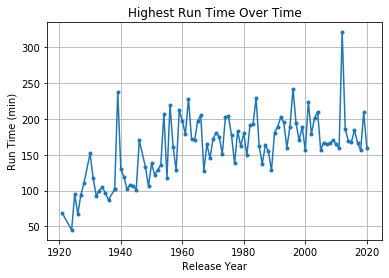

In [48]:
# Plotting highest movie runtime over time

plt.plot(high_rt_by_year['Released_Year'], high_rt_by_year['Runtime_min'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Run Time (min)')
plt.title('Highest Run Time Over Time')
plt.grid()
plt.show()

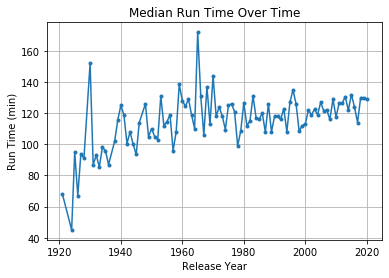

In [49]:
# Plotting median movie runtime over time

median_rt_by_year = mv_rating_clean.groupby('Released_Year').median().reset_index()

plt.plot(median_rt_by_year['Released_Year'], median_rt_by_year['Runtime_min'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Run Time (min)')
plt.title('Median Run Time Over Time')
plt.grid()
plt.show()

From the results of both graphs, it can be observed that as time goes by, the run time of movies increases.

#### Highest Gross

For this part, I'll find movies with the highest gross all time and movies with the highest gross grouped by its release year.

In [50]:
# Movies with the highest all time gross

at_high_g = mv_rating_clean[mv_rating_clean['Gross_num'] == mv_rating_clean['Gross_num'].max()]
at_high_g[['Released_Year', 'Series_Title', 'Gross_num']]

,Released_Year,Series_Title,Gross_num
477,2015,Star Wars: Episode VII - The Force Awakens,936662225


It looks like the 7th episode of Star Wars is the all time movie with the highest gross with a value of $ 936,662,225.

In [51]:
# Movies with the highest gross grouped by year

gr_high_by_year = mv_rating_clean.groupby('Released_Year').max().reset_index()
gross_high_by_year = movie_finder(gr_high_by_year['Released_Year'], gr_high_by_year['Gross_num'], 'Released_Year', 'Gross_num')
print(gross_high_by_year[['Released_Year', 'Series_Title', 'Gross_num']].set_index('Released_Year').to_string())

                                                 Series_Title  Gross_num
Released_Year                                                           
1921                                                  The Kid    5450000
1924                                             Sherlock Jr.     977375
1925                                            The Gold Rush    5450000
1926                                              The General    1033895
1927                            Sunrise: A Song of Two Humans     539540
1928                                               The Circus   23530892
1930                           All Quiet on the Western Front    3270000
1931                                             Frankenstein   23530892
1932                        Scarface: The Shame of the Nation   23530892
1933                                        The Invisible Man   23530892
1934                                             The Thin Man   23530892
1935                                     A Night at

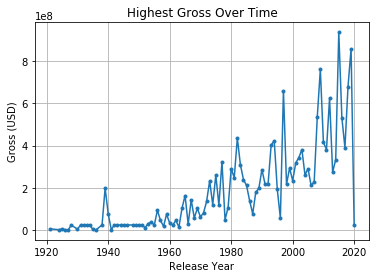

In [52]:
# Plotting highest gross movies over time

plt.plot(gr_high_by_year['Released_Year'], gr_high_by_year['Gross_num'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Gross (USD)')
plt.title('Highest Gross Over Time')
plt.grid()
plt.show()

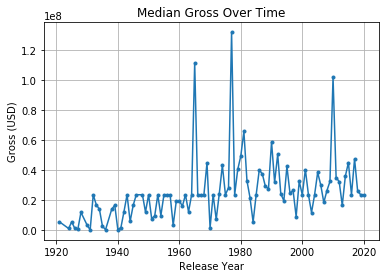

In [53]:
# Plotting median gross movies over time

median_gr_by_year = mv_rating_clean.groupby('Released_Year').median().reset_index()

plt.plot(median_gr_by_year['Released_Year'], median_gr_by_year['Gross_num'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Gross (USD)')
plt.title('Median Gross Over Time')
plt.grid()
plt.show()

From the graphs above, it seems like the trend of the highest all time movie gross increases exponentially over time. On the other hand the median trend of gross over time increases only by a little bit. A total of three outliers can also be observed in between the year 1960 and the 2010s.

#### Lowest IMDB Rating

For this part, I'll find movies with the lowest all time imdb rating and movies with the lowest imdb rating grouped by year.

Note: Starting from this section, I'm not going to plot the median graph anymore since the result will be exactly the same with the ones that have been done above.

In [54]:
# Movies with the lowest all time imdb rating

at_low_rat = mv_rating_clean[mv_rating_clean['IMDB_Rating'] == mv_rating_clean['IMDB_Rating'].min()]
lw_ratings = at_low_rat[['Released_Year', 'Series_Title', 'IMDB_Rating']].set_index('Released_Year').sort_index().to_string()
print(lw_ratings)

                                                 Series_Title  IMDB_Rating
Released_Year                                                             
1953                                    From Here to Eternity          7.6
1956                                                    Giant          7.6
1961                                   Breakfast at Tiffany's          7.6
1964                                       A Hard Day's Night          7.6
1966                                                   Blowup          7.6
1967                                          The Jungle Book          7.6
1970                                           Kelly's Heroes          7.6
1971                                             Giù la testa          7.6
1973                                         The Long Goodbye          7.6
1977                       Close Encounters of the Third Kind          7.6
1978                                         Midnight Express          7.6
1978                     

In [55]:
f'Number of all time low rated movies: {len(at_low_rat.IMDB_Rating)}'

'Number of all time low rated movies: 114'

Surprisingly, the movies with the lowest all time imdb rating is only 7.6 and there seem to be 114 movies that has that rating.

In [56]:
# Movies with the lowest imdb rating grouped by year

low_rt_by_year = mv_rating_clean.groupby('Released_Year').min().reset_index()
lw_rt_by_year = movie_finder(low_rt_by_year['Released_Year'], low_rt_by_year['IMDB_Rating'], 'Released_Year', 'IMDB_Rating')
print(lw_rt_by_year[['Released_Year', 'Series_Title', 'IMDB_Rating']].set_index('Released_Year').to_string())

                                                 Series_Title  IMDB_Rating
Released_Year                                                             
1921                                                  The Kid          8.3
1924                                             Sherlock Jr.          8.2
1925                                            The Gold Rush          8.2
1926                                              The General          8.1
1927                            Sunrise: A Song of Two Humans          8.1
1928                               La passion de Jeanne d'Arc          8.1
1928                                               The Circus          8.1
1930                           All Quiet on the Western Front          8.0
1931                                             Frankenstein          7.8
1932                        Scarface: The Shame of the Nation          7.8
1933                                        The Invisible Man          7.7
1934                     

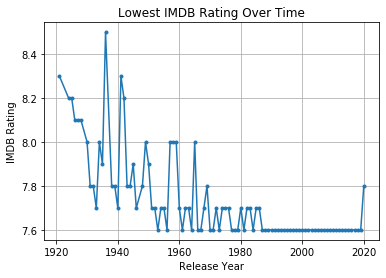

In [57]:
# Plotting lowest imdb rating over time

plt.plot(low_rt_by_year['Released_Year'], low_rt_by_year['IMDB_Rating'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('IMDB Rating')
plt.title('Lowest IMDB Rating Over Time')
plt.grid()
plt.show()

Over time, the overall trend kept on dropping in rating numbers which means that as time goes by, there are movies that recevied a lower rating than the previous year's except for the year 2020 where the lowest movie rating is 7.8.

#### Lowest Meta Score

For this part, I'll find movies with the lowest all time meta score and movies with the lowest meta score grouped by year.

In [58]:
# Movies with the lowest all time meta score

at_lw_ms = mv_rating_clean[mv_rating_clean['Meta_score'] == mv_rating_clean['Meta_score'].min()]
at_lw_ms[['Released_Year', 'Series_Title', 'Meta_score']]

,Released_Year,Series_Title,Meta_score
788,2001,I Am Sam,28.0


Looks like I am Sam has the lowest rating of all time with a value of 28. To be honest, I didn't expect that there will be a movie that has this kind of rating. The worse that I can think of is that the lowest meta score that a movie might get is at least around 50.

In [59]:
# Movies with the lowest meta score grouped by year

lw_ms_by_year = mv_rating_clean.groupby('Released_Year').min().reset_index()
lwst_ms_by_year = movie_finder(lw_ms_by_year['Released_Year'], lw_ms_by_year['Meta_score'], 'Released_Year', 'Meta_score')
print(lwst_ms_by_year[['Released_Year', 'Series_Title', 'Meta_score']].set_index('Released_Year').to_string())

                                             Series_Title  Meta_score
Released_Year                                                        
1921                                              The Kid        78.0
1924                                         Sherlock Jr.        78.0
1925                                        The Gold Rush        78.0
1926                                          The General        78.0
1927                        Sunrise: A Song of Two Humans        78.0
1928                           La passion de Jeanne d'Arc        78.0
1930                       All Quiet on the Western Front        91.0
1931                    M - Eine Stadt sucht einen Mörder        78.0
1932                    Scarface: The Shame of the Nation        87.0
1933                                    The Invisible Man        87.0
1934                                         The Thin Man        86.0
1935                                 A Night at the Opera        78.0
1936                

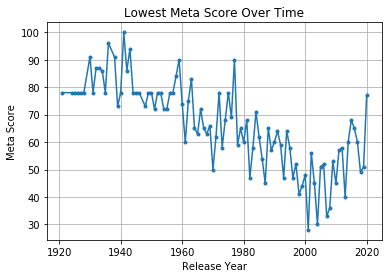

In [60]:
# Plotting lowest meta score over time

plt.plot(lw_ms_by_year['Released_Year'], lw_ms_by_year['Meta_score'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Meta Score')
plt.title('Lowest Meta Score Over Time')
plt.grid()
plt.show()

Looks like the trend is decreasing from 1920 up to 2000 before going into an up trend. I guess this might be because the movies in the 2000s gets better and better that even the lowest rated ones managed to get a higher rating than the lowest rated movies from the previous year.

#### Lowest Number of Votes

For this part, I'll find movies with the lowest all time no. of votes and movies with the lowest no. of votes grouped by year.

In [61]:
# Movies with the lowest all time no. of votes

at_low_nv = mv_rating_clean[mv_rating_clean['No_of_Votes'] == mv_rating_clean['No_of_Votes'].min()]
at_low_nv[['Released_Year', 'Series_Title', 'No_of_Votes']]

,Released_Year,Series_Title,No_of_Votes
264,1993,Ba wang bie ji,25088


It seems that Ba wang bie ji has the lowest rating with a value of 25.088 votes.

In [62]:
# Movies with the lowest no. of votes grouped by year

lw_nv_gr = mv_rating_clean.groupby('Released_Year').min().reset_index()
lw_nv_gr_ss = movie_finder(lw_nv_gr['Released_Year'], lw_nv_gr['No_of_Votes'], 'Released_Year', 'No_of_Votes')
print(lw_nv_gr_ss[['Released_Year', 'Series_Title', 'No_of_Votes']].set_index('Released_Year').to_string())

                                                    Series_Title  No_of_Votes
Released_Year                                                                
1921                                                     The Kid       113314
1924                                                Sherlock Jr.        41985
1925                                               The Gold Rush       101053
1926                                                 The General        81156
1927                               Sunrise: A Song of Two Humans        46865
1928                                                  The Circus        30205
1930                              All Quiet on the Western Front        57318
1931                                                Frankenstein        65341
1932                           Scarface: The Shame of the Nation        25312
1933                                           The Invisible Man        30683
1934                                                The Thin Man

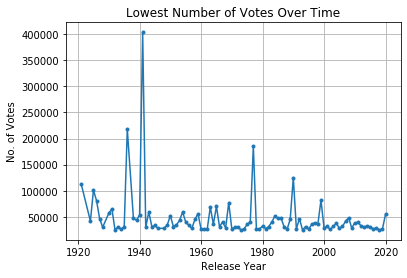

In [63]:
# Plotting lowest no. of votes over time

plt.plot(lw_nv_gr['Released_Year'], lw_nv_gr['No_of_Votes'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('No. of Votes')
plt.title('Lowest Number of Votes Over Time')
plt.grid()
plt.show()

It seems like there are some outliers which makes it hard to see the overall trend of the graph. For this reason I'll try to filter out the outliers by filtering for movies that received less than 80000 votes.

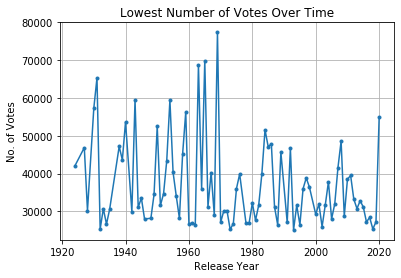

In [64]:
lw_nv_gr_no_outliers = lw_nv_gr[lw_nv_gr['No_of_Votes'] < 80000]

plt.plot(lw_nv_gr_no_outliers['Released_Year'], lw_nv_gr_no_outliers['No_of_Votes'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('No. of Votes')
plt.title('Lowest Number of Votes Over Time')
plt.grid()
plt.show()

The number of votes a movie gets are fluctuating heavily as time goes by. I can't really tell if it has an upward trend or a downward trend but I can see that from the 1920s up to the 1960s, the trend goes down by a bit and goes up right before the touching the year 1960. From there, the trend sky rocketed reaching its peak at the 1970s before continuing its down trend up to 1980. Starting from there, the trend goes up again and fluctuated until the year 2020 where it has the highest value in the 21st century.

#### Lowest Runtime

For this part, I'll find movies with the lowest all time run time and movies with the lowest run time grouped by year.

In [65]:
# Movies with the lowest all time runtime

at_lw_rt = mv_rating_clean[mv_rating_clean['Runtime_min'] == mv_rating_clean['Runtime_min'].min()]
at_lw_rt[['Released_Year', 'Series_Title', 'Runtime_min']]

,Released_Year,Series_Title,Runtime_min
194,1924,Sherlock Jr.,45


Looks like Shelock Jr. is the movie that has the lowest duration with only a value of 45 minutes long. It's basically on par with the duration of K-dramas or J-dramas nowadays. Even some K-dramas and J-dramas last longer than 45 minutes up to an hour.

In [66]:
# Movies with the lowest no. of votes grouped by year

lw_rt_by_year = mv_rating_clean.groupby('Released_Year').min().reset_index()
lw_rt_by_year_ss = movie_finder(lw_rt_by_year['Released_Year'], lw_rt_by_year['Runtime_min'], 'Released_Year', 'Runtime_min')
print(lw_rt_by_year_ss[['Released_Year', 'Series_Title', 'Runtime_min']].set_index('Released_Year').to_string())

                                                 Series_Title  Runtime_min
Released_Year                                                             
1921                                                  The Kid           68
1924                                             Sherlock Jr.           45
1925                                            The Gold Rush           95
1926                                              The General           67
1927                            Sunrise: A Song of Two Humans           94
1928                                               The Circus           72
1930                           All Quiet on the Western Front          152
1931                                             Frankenstein           70
1932                        Scarface: The Shame of the Nation           93
1933                                        The Invisible Man           71
1934                                             The Thin Man           91
1935                     

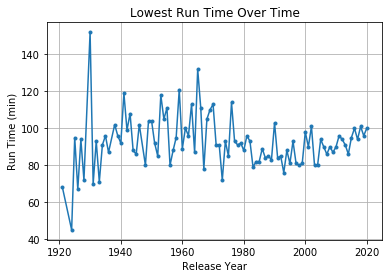

In [67]:
# Plotting lowest runtime over time

plt.plot(lw_rt_by_year['Released_Year'], lw_rt_by_year['Runtime_min'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Run Time (min)')
plt.title('Lowest Run Time Over Time')
plt.grid()
plt.show()

The overall trend of the lowest movie run time seem to be increasing from 1920 to around 1930 before dropping and starts increasing again up to the mid 1960s. From there, the trend seem to go downward until the early 2000s before going up again to 2020.

#### Lowest Gross

For this part, I'll find movies with the lowest all time gross and movies with the lowest gross grouped by year.

In [68]:
# Movies with the lowest all time gross

at_low_gr = mv_rating_clean[mv_rating_clean['Gross_num'] == mv_rating_clean['Gross_num'].min()]
at_low_gr[['Released_Year', 'Series_Title', 'Gross_num']]

,Released_Year,Series_Title,Gross_num
630,2005,Adams æbler,1305


It seems like Adams æbler has the lowest gross of $ 1,305 which is very low in my opinion when compared to other movies in 2005.

I'm getting curious about why they have a very low gross value. I'll try to compare this movie with other movies that have a similar genre with it from the year 2005.

In [69]:
# Finding out the movie genre

mv_rating_clean[mv_rating_clean['Series_Title'] == 'Adams æbler']['Genre']

630    Comedy, Crime, Drama
Name: Genre, dtype: object

In [70]:
# Movies that has a comedy genre
 
comedy_2005 = mv_rating_clean[(mv_rating_clean['Released_Year'] == 2005) & (mv_rating_clean['Genre'].str.contains('Comedy'))]
comedy_2005 = comedy_2005[['Series_Title', 'Genre', 'Meta_score', 'Gross_num']]

# Movies that has a drama genre

drama_2005 = mv_rating_clean[(mv_rating_clean['Released_Year'] == 2005) & (mv_rating_clean['Genre'].str.contains('Drama'))]
drama_2005 = drama_2005[['Series_Title', 'Genre', 'Meta_score', 'Gross_num']]

# Movies that has a crime genre

crime_2005 = mv_rating_clean[(mv_rating_clean['Released_Year'] == 2005) & (mv_rating_clean['Genre'].str.contains('Crime'))]
crime_2005 = crime_2005[['Series_Title', 'Genre', 'Meta_score', 'Gross_num']]

display(comedy_2005, drama_2005, crime_2005)

,Series_Title,Genre,Meta_score,Gross_num
630,Adams æbler,"Comedy, Crime, Drama",51.0,1305


,Series_Title,Genre,Meta_score,Gross_num
152,V for Vendetta,"Action, Drama, Sci-Fi",62.0,70511035
154,Black,Drama,78.0,733094
373,Cinderella Man,"Biography, Drama, History",69.0,61649911
630,Adams æbler,"Comedy, Crime, Drama",51.0,1305
631,Pride & Prejudice,"Drama, Romance",82.0,38405088
632,The World's Fastest Indian,"Biography, Drama, Sport",68.0,5128124
635,Walk the Line,"Biography, Drama, Music",72.0,119519402
769,Joyeux Noël,"Drama, History, Music",70.0,1054361
773,Brokeback Mountain,"Drama, Romance",87.0,83043761
929,Match Point,"Drama, Romance, Thriller",72.0,23089926


,Series_Title,Genre,Meta_score,Gross_num
364,Sin City,"Crime, Thriller",74.0,74103820
630,Adams æbler,"Comedy, Crime, Drama",51.0,1305
931,Lord of War,"Action, Crime, Drama",62.0,24149632


From the tables displayed above, Adams æbler has the lowest meta score compared with movies with a similar genre. If I were to look at only the tables, it looks like it has a bad rating because of the comedy incorporated in a drama and crime genre. Movies with a crima and drama genre tend to be serious in tone. Maybe people didn't like it that much which explains the low meta score and gross value. It's still hard to tell because other movies have different genres as well incorporated within it so I can't be 100% certain that my theory is correct.

In [71]:
# Movies with the lowest gross grouped by year

lw_gr_by_year = mv_rating_clean.groupby('Released_Year').min().reset_index()
lw_gr_by_year_ss = movie_finder(lw_gr_by_year['Released_Year'], lw_gr_by_year['Gross_num'], 'Released_Year', 'Gross_num')
print(lw_gr_by_year_ss[['Released_Year', 'Series_Title', 'Gross_num']].set_index('Released_Year').to_string())

                                                    Series_Title  Gross_num
Released_Year                                                              
1921                                                     The Kid    5450000
1924                                                Sherlock Jr.     977375
1925                                               The Gold Rush    5450000
1926                                                 The General    1033895
1927                               Sunrise: A Song of Two Humans     539540
1928                                  La passion de Jeanne d'Arc      21877
1930                              All Quiet on the Western Front    3270000
1931                                                 City Lights      19181
1932                           Scarface: The Shame of the Nation   23530892
1933                                                   King Kong   10000000
1934                                       It Happened One Night    4360000
1935        

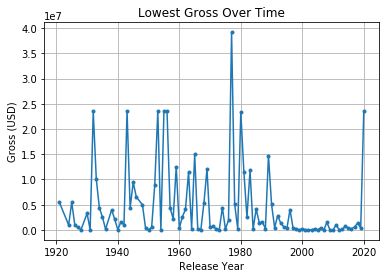

In [72]:
# Plotting lowest gross over time

plt.plot(lw_gr_by_year['Released_Year'], lw_gr_by_year['Gross_num'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Gross (USD)')
plt.title('Lowest Gross Over Time')
plt.grid()
plt.show()

From the graph, the lowest gross numbers are fluctuating heavily. The obvious one is that around the year 2000 to 2019, the gross numbers are the lowest. I'll try to make a graph around the year 1995 - 2019 time frame to get a better look at the trend.

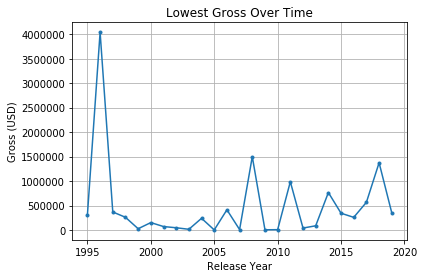

In [73]:
lw_gr_by_year_1990_2019 = lw_gr_by_year[(lw_gr_by_year['Released_Year'] >= 1995) & (lw_gr_by_year['Released_Year'] < 2020)]

plt.plot(lw_gr_by_year_1990_2019['Released_Year'], lw_gr_by_year_1990_2019['Gross_num'], marker='.')
plt.xlabel('Release Year')
plt.ylabel('Gross (USD)')
plt.title('Lowest Gross Over Time')
plt.grid()
plt.show()

Looks like the peak is at the year 1996 and the trend follows a downtrend afterwards up until 2005 before going into an uptrend.

#### Does the duration of movies in the 2000s last longer compared to the 1900s?

In [74]:
# Create 2 new dfs

mv_year_1900s = mv_rating_clean[mv_rating_clean['Released_Year'] < 2000]
mv_year_2000s = mv_rating_clean[~(mv_rating_clean['Released_Year'] < 2000)]

In [75]:
# Making sure that the filtering is correct

mv_year_1900s['Released_Year'].unique()

array([1994, 1972, 1974, 1957, 1993, 1999, 1966, 1990, 1980, 1975, 1998,
       1997, 1995, 1991, 1977, 1954, 1946, 1988, 1985, 1968, 1960, 1942,
       1936, 1931, 1984, 1981, 1979, 1971, 1964, 1950, 1940, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1962, 1959, 1958, 1952, 1944, 1941,
       1921, 1989, 1978, 1963, 1961, 1953, 1948, 1925, 1924, 1996, 1982,
       1967, 1951, 1949, 1939, 1934, 1928, 1927, 1926, 1970, 1969, 1956,
       1945, 1930, 1955, 1938, 1935, 1933, 1943, 1932], dtype=int64)

In [76]:
mv_year_2000s['Released_Year'].unique()

array([2008, 2003, 2010, 2001, 2002, 2020, 2019, 2014, 2011, 2006, 2000,
       2018, 2017, 2016, 2012, 2009, 2007, 2013, 2004, 2015, 2005],
      dtype=int64)

Plotting a boxplot to see the distribution of both dfs to decide if taking the mean for comparing the run time is possible, if there are a lot of outliers, I'll take the median value to compare both of them.

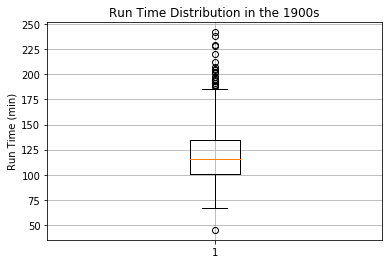

In [77]:
plt.boxplot(mv_year_1900s['Runtime_min'])
plt.ylabel('Run Time (min)')
plt.title('Run Time Distribution in the 1900s')
plt.grid()
plt.show()

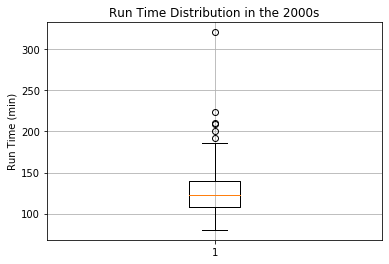

In [78]:
plt.boxplot(mv_year_2000s['Runtime_min'])
plt.ylabel('Run Time (min)')
plt.title('Run Time Distribution in the 2000s')
plt.grid()
plt.show()

Looks like the 1900s run time distribution contains a lot of outliers. In this case, I'll take the median values to compare their run time.

In [79]:
rt_median_1900s = mv_year_1900s['Runtime_min'].median()
rt_median_2000s = mv_year_2000s['Runtime_min'].median()

print(f'1900s Movie Run Time Median: {rt_median_1900s} minutes\n2000s Movie Run Time Median: {rt_median_2000s} minutes')

1900s Movie Run Time Median: 116.0 minutes
2000s Movie Run Time Median: 123.0 minutes


As seen from the results, the run time in the 1900s and the 2000s didn't differ by much however, movies in the 2000s tend to last longer than movies in the 1900s.

#### Does movies in the 1900s tend to have a higher rating than the 2000s?


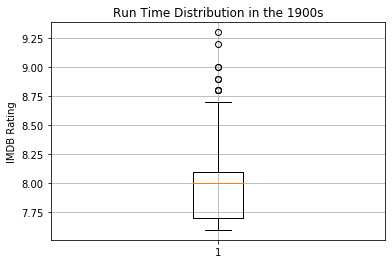

In [80]:
plt.boxplot(mv_year_1900s['IMDB_Rating'])
plt.ylabel('IMDB Rating')
plt.title('Run Time Distribution in the 1900s')
plt.grid()
plt.show()

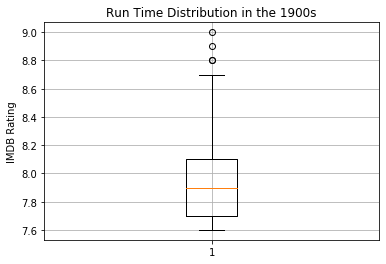

In [81]:
plt.boxplot(mv_year_2000s['IMDB_Rating'])
plt.ylabel('IMDB Rating')
plt.title('Run Time Distribution in the 1900s')
plt.grid()
plt.show()

In [82]:
rat_median_1900s = mv_year_1900s['IMDB_Rating'].median()
rat_median_2000s = mv_year_2000s['IMDB_Rating'].median()

print(f'1900s Movie IMDB Rating Median: {rat_median_1900s}\n2000s Movie IMDB Rating Median: {rat_median_2000s}')

1900s Movie IMDB Rating Median: 8.0
2000s Movie IMDB Rating Median: 7.9


From the results shown, I would say that as time goes by, movie ratings are approximately the same. To be more specific, from the 1900s to the 2000s, the median movie ratings only dropped by 0.1 which is not that big of a deal and can be implied that on average, the passing of time doesn't affect the movie ratings.

#### Count of certificate category (ex: A 4, UA 8, etc)

In [83]:
cert_count = mv_rating_clean['Certificate_new'].value_counts()
cert_count

U           246
A           198
UA          176
R           146
PG-13        43
PG           42
Passed       34
Approved     11
Unrated       1
TV-14         1
16            1
Name: Certificate_new, dtype: int64

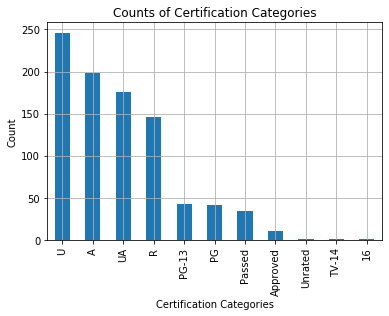

In [84]:
cert_count.plot(kind='bar', x=cert_count.index)
plt.xlabel('Certification Categories')
plt.ylabel('Count')
plt.title('Counts of Certification Categories')
plt.grid()
plt.show()

Looks like overall, most of the movies are rated U which means that it could be watched by people of all ages followed by A rating which means that the target audience are adults. After that it's followed by UA, R and so on.

#### Does a high gross movie mean a higher rating for a given movie?



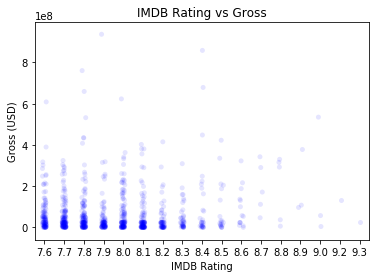

In [85]:
# Scatter plot for imdb rating vs gross

sns.stripplot(x='IMDB_Rating', y='Gross_num', data=mv_rating_clean, jitter=True, alpha=0.1, color='b')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross (USD)')
plt.title('IMDB Rating vs Gross')
plt.show()

In [86]:
rat_gr_df = pd.DataFrame(columns=['IMDB_Rating', 'Gross_num'])
rat_gr_df['IMDB_Rating'] = mv_rating_clean['IMDB_Rating']
rat_gr_df['Gross_num'] = mv_rating_clean['Gross_num']

rat_gr_df.corr()

,IMDB_Rating,Gross_num
IMDB_Rating,1.000000,0.086132
Gross_num,0.086132,1.000000


From the scatter plot, the data points are not even linearly correlated at all and most of the data points are clustered near the 0 tick of the y-axis. When looking at the correlation coefficient, the value is close to 0 which means that they are not correlated at all.

#### Does a high no. of votes mean that a movie will have a higher gross?

In [87]:
nv_gr_df = pd.DataFrame(columns=['No_of_Votes', 'Gross_num'])
nv_gr_df['No_of_Votes'] = mv_rating_clean['No_of_Votes']
nv_gr_df['Gross_num'] = mv_rating_clean['Gross_num']

nv_gr_df.corr()

,No_of_Votes,Gross_num
No_of_Votes,1.000000,0.576514
Gross_num,0.576514,1.000000


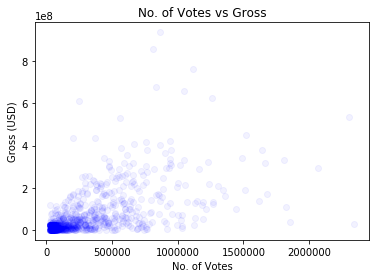

In [88]:
plt.scatter(nv_gr_df['No_of_Votes'], nv_gr_df['Gross_num'], alpha=0.05, color='b')
plt.xlabel('No. of Votes')
plt.ylabel('Gross (USD)')
plt.title('No. of Votes vs Gross')
plt.show()

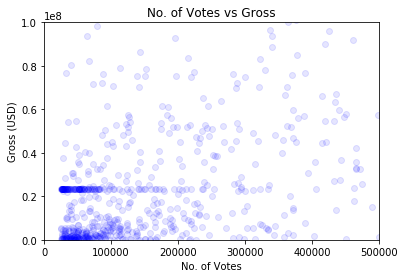

In [89]:
plt.scatter(nv_gr_df['No_of_Votes'], nv_gr_df['Gross_num'], alpha=0.1, color='b')
plt.xlabel('No. of Votes')
plt.ylabel('Gross (USD)')
plt.title('No. of Votes vs Gross')
plt.xlim([0, 0.5e6])
plt.ylim([0, 1e8])
plt.show()

When looking at the correlation coefficient only, it's seen that number of votes and the gross of a movie are moderately correlated in some way. When we see the scatter plot, it looks like the higher the number of votes a movie has, the larger its gross value. However, overplotting can be observed at the bottom left of the plot. After zooming in to that particular area, the data points seem to be randomly spread out and as seen on the result below, the correlation coefficient becomes smaller.

In [90]:
nv_gr_df_filtered = nv_gr_df[(nv_gr_df['No_of_Votes'] <= 5e5) & (nv_gr_df['Gross_num'] <= 1e8)]

nv_gr_df_filtered.corr()

,No_of_Votes,Gross_num
No_of_Votes,1.000000,0.408333
Gross_num,0.408333,1.000000
